In [1]:
import pandas as pd
import scipy as sp
import scipy.stats as stats
import scipy.stats as linregress
import matplotlib.pyplot as plt
import numpy as np

In [62]:
combined = "output/my_combined.csv"
combined_df = pd.read_csv(combined)
combined_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,TractSNAP,Food Environment Index,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,2,2,1,2,...,2682,6.9,830.0,9158.0,34,18,711.0,145.0,1327.0,19.0
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,3,3,3,2,...,6471,7.5,2573.0,7394.0,27,16,2615.0,415.0,4791.0,20.0
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,3,3,1,2,...,2097,4.9,413.0,8573.0,44,25,525.0,85.0,771.0,45.0
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,0,0,0,1,...,1125,7.3,407.0,11766.0,40,20,333.0,33.0,561.0,29.0
4,Alabama,Blount,57322,21578,17.911111,52136.000000,0,0,0,2,...,2900,8.3,906.0,9333.0,35,19,705.0,123.0,1316.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,0,0,0,2,...,835,8.1,445.0,6878.0,32,16,469.0,159.0,1053.0,10.0
3094,Wyoming,Teton,21294,8973,8.100000,89555.250000,0,0,0,0,...,128,8.0,116.0,3728.0,13,12,104.0,NaN,558.0,8.0
3095,Wyoming,Uinta,21118,7668,14.166667,65312.666667,0,0,0,0,...,621,7.5,234.0,7660.0,28,15,243.0,8.0,475.0,12.0
3096,Wyoming,Washakie,8533,3492,14.133333,62213.666667,0,1,0,0,...,337,8.0,97.0,7294.0,28,14,156.0,7.0,174.0,16.0


In [63]:
#Change the state and you get the counties for that state

state = combined_df.loc[combined_df["State"] == "Wyoming",:]
the_state = state.iat[0,0]
counties = state["County"].tolist()
x_axis = np.arange(len(counties))

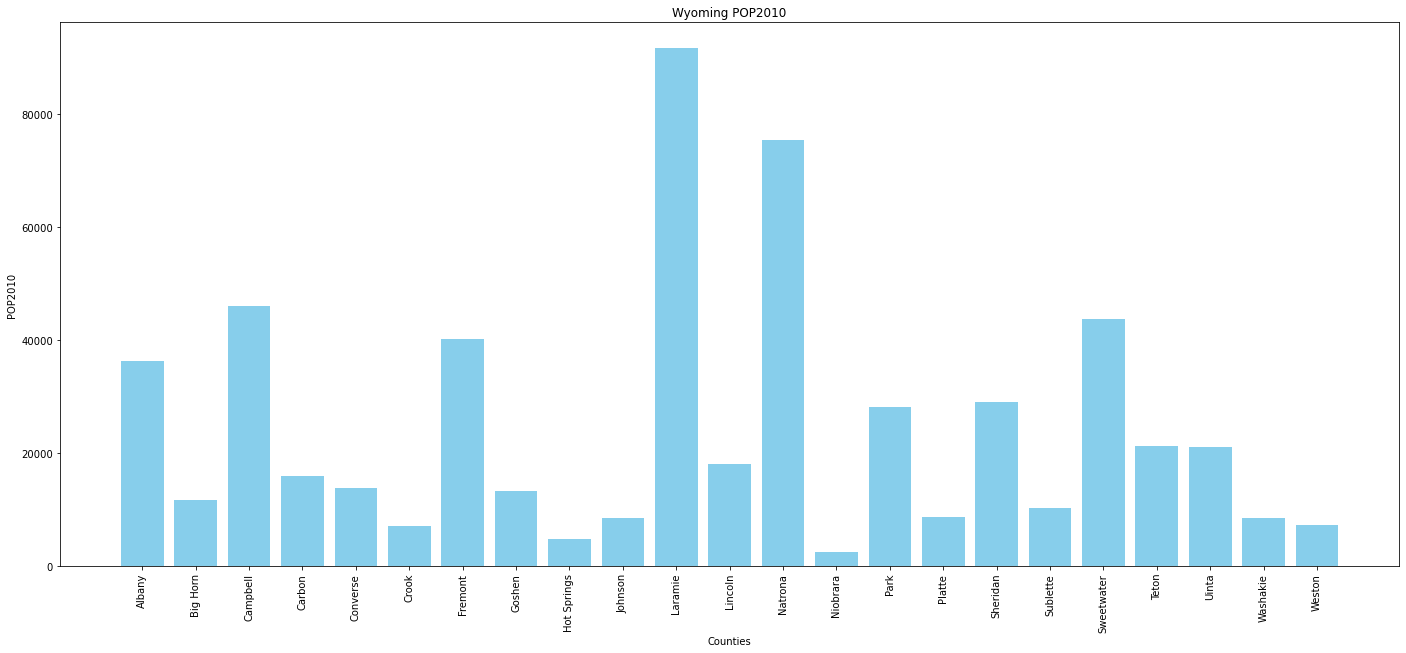

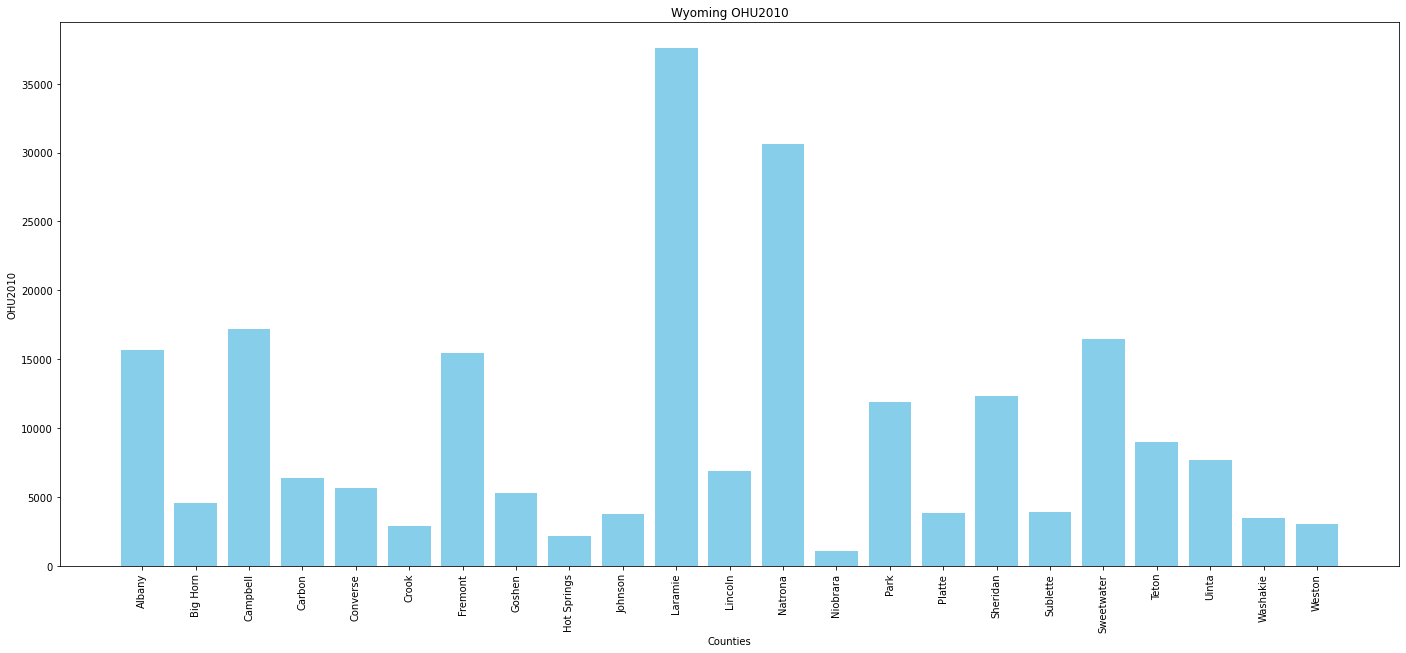

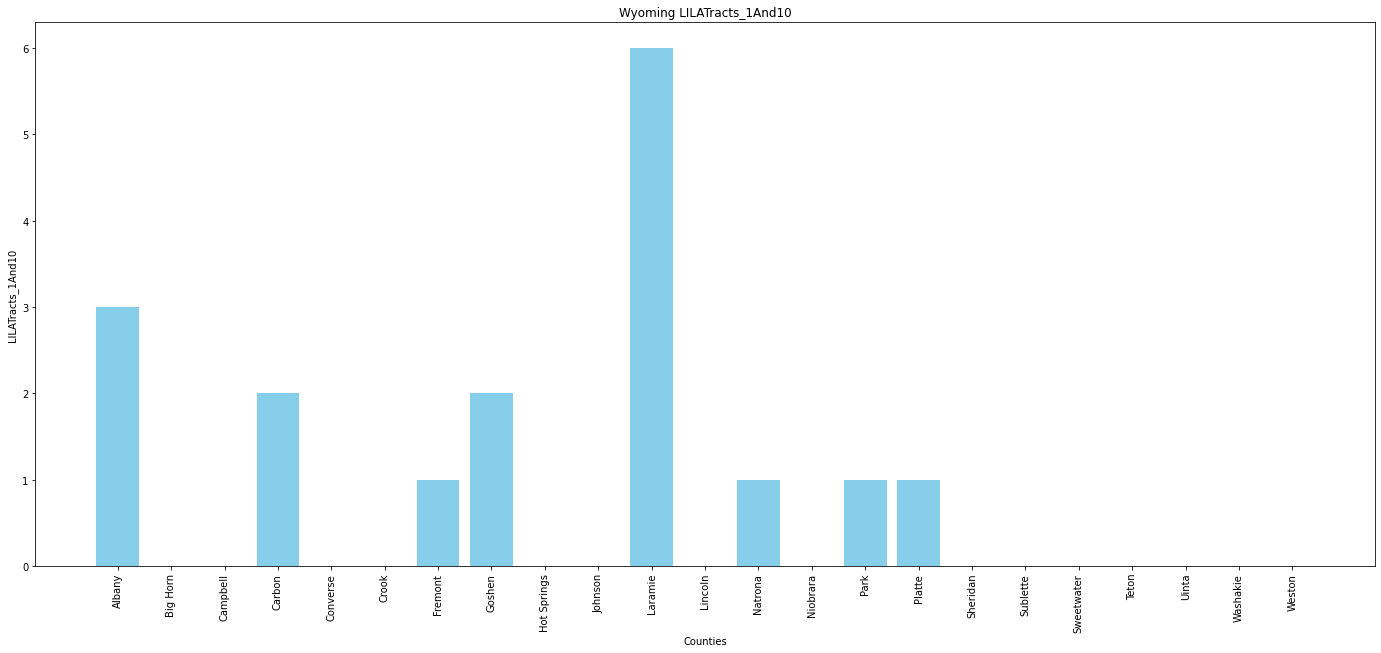

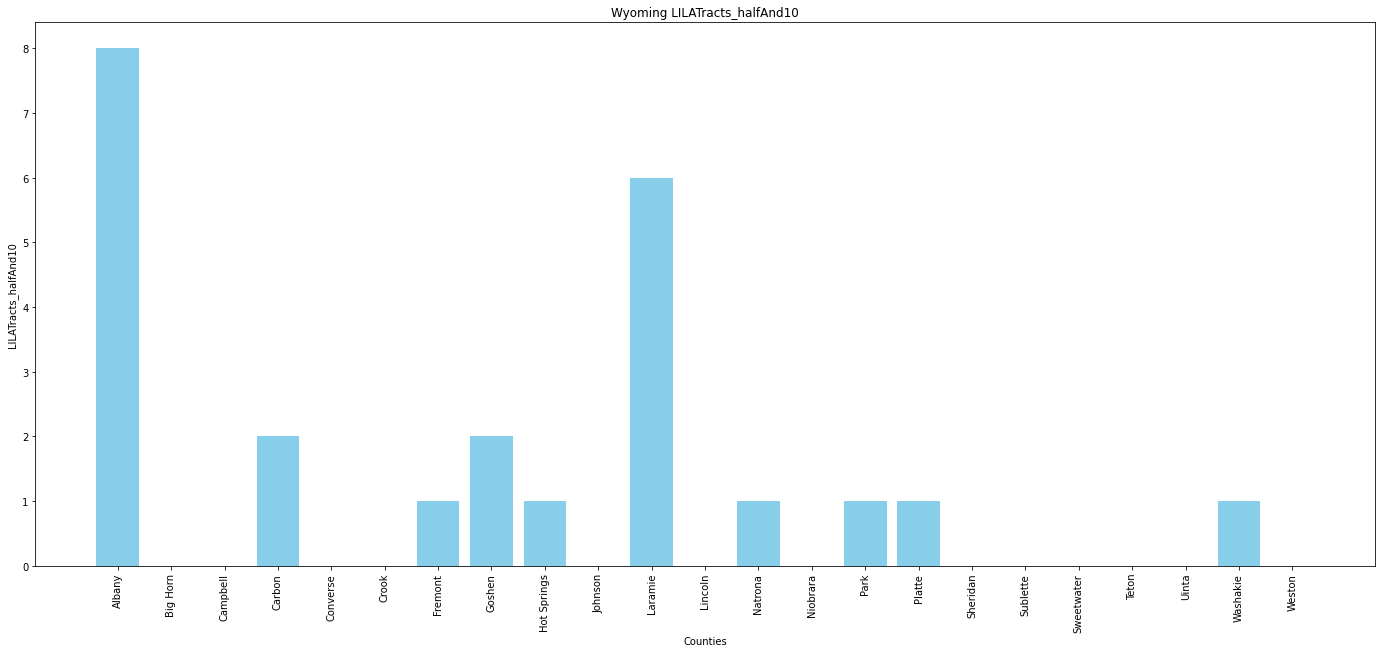

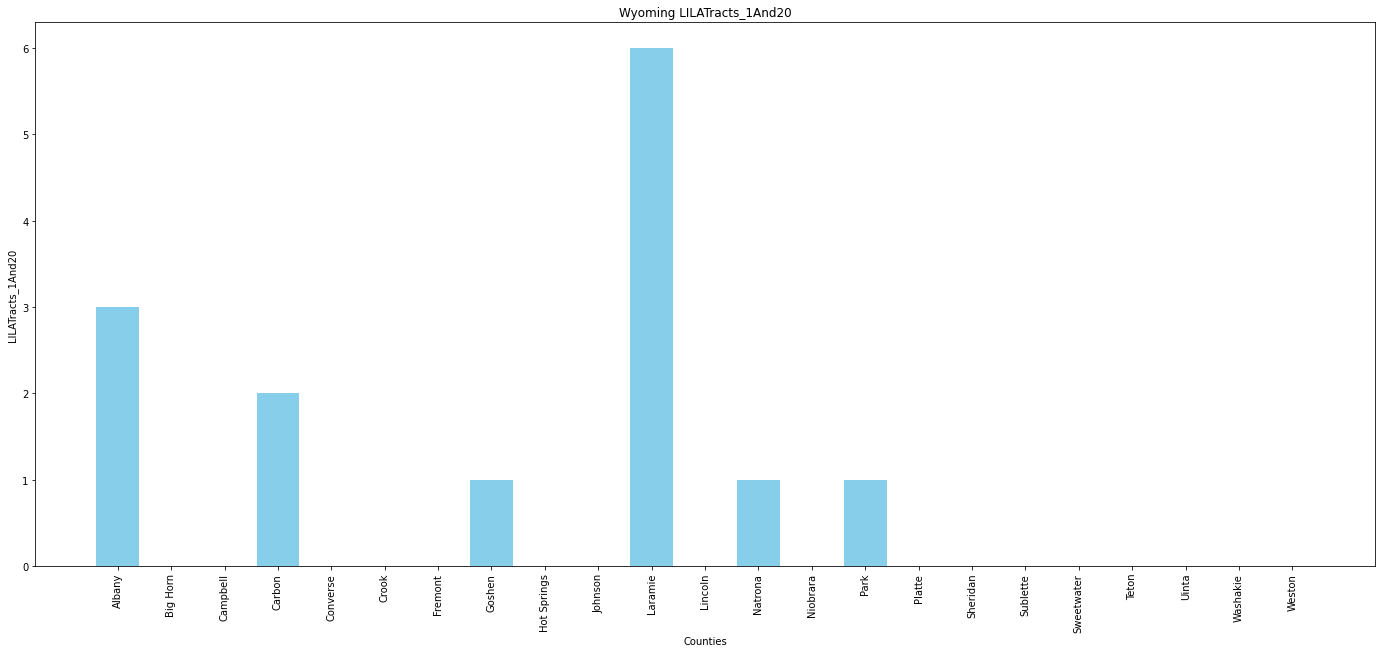

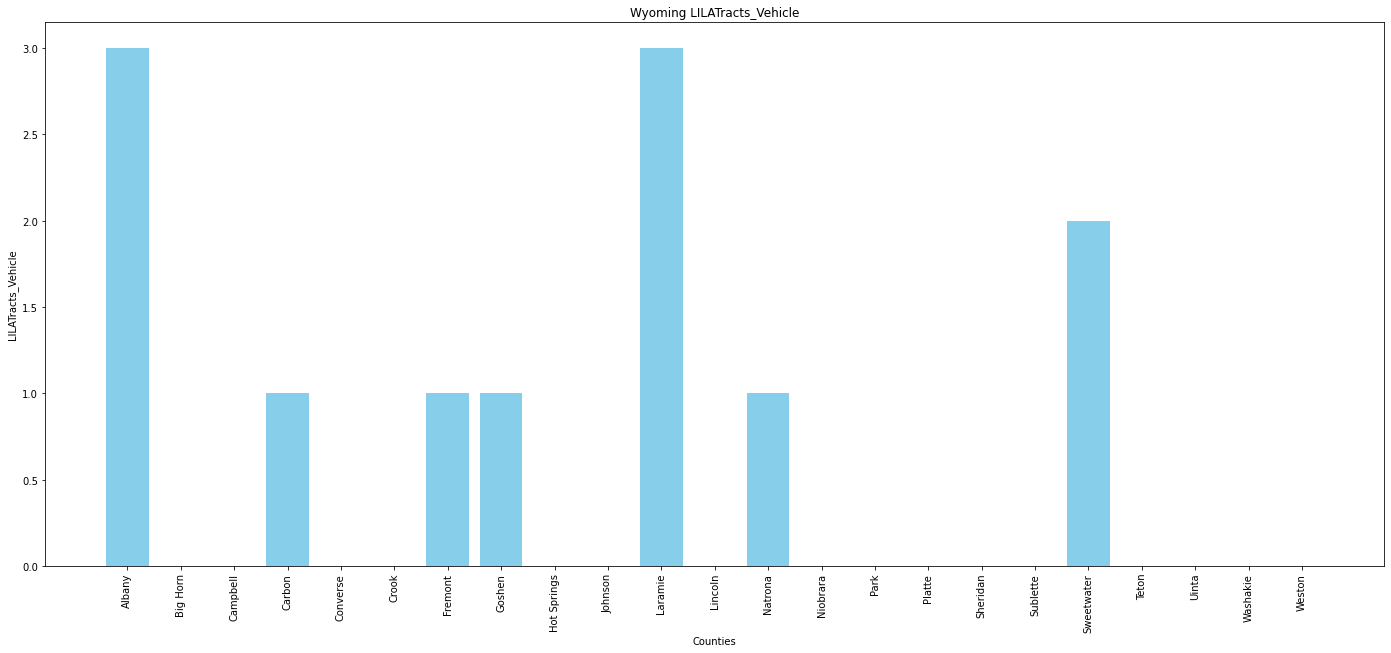

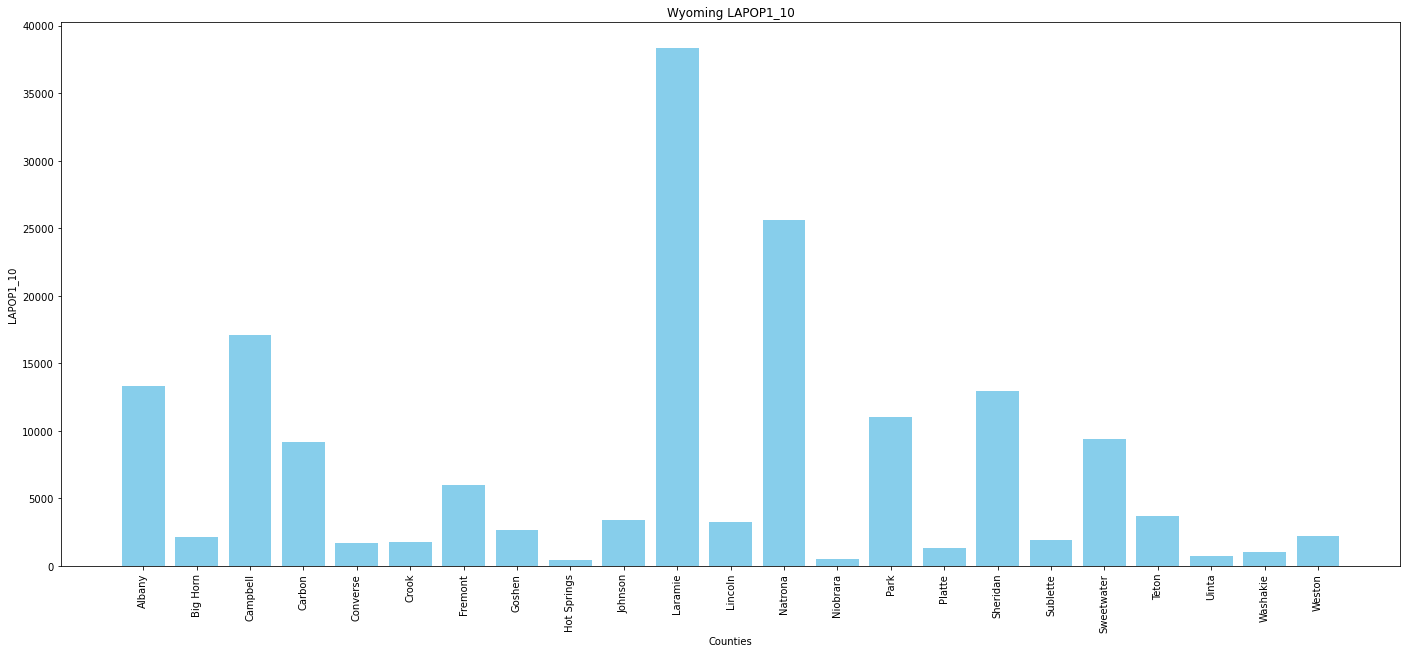

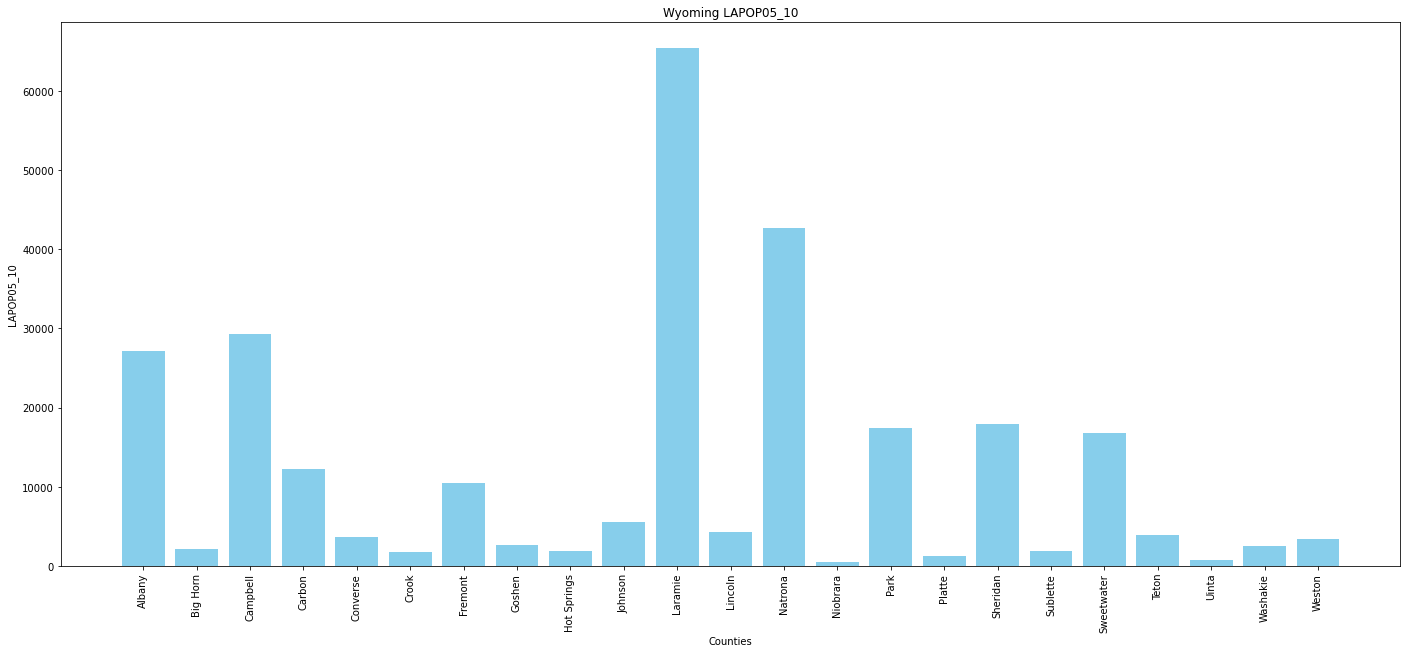

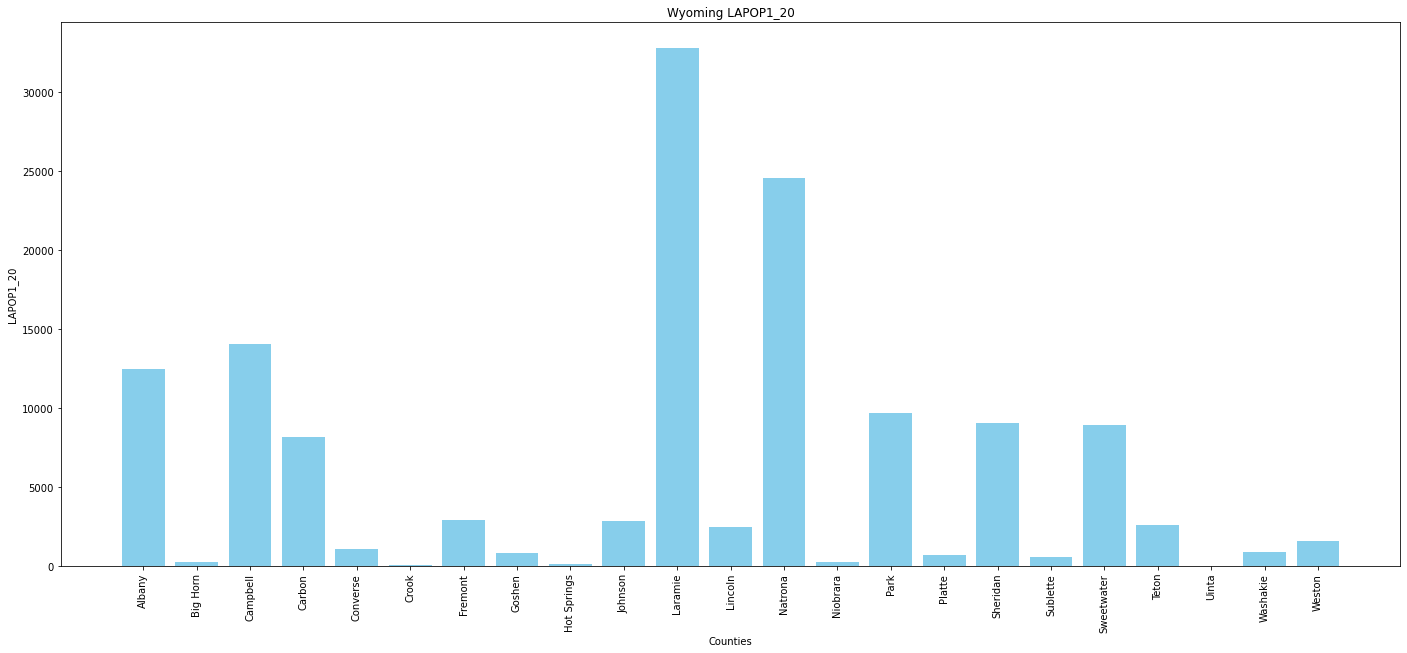

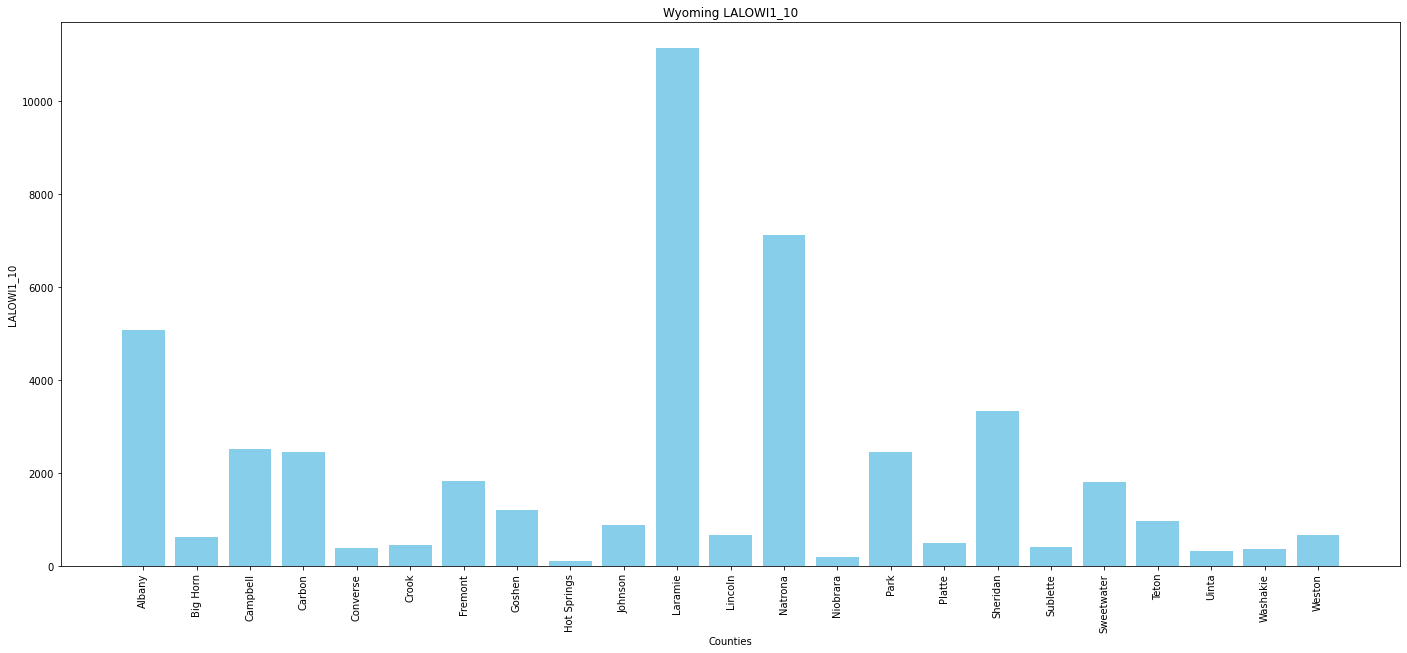

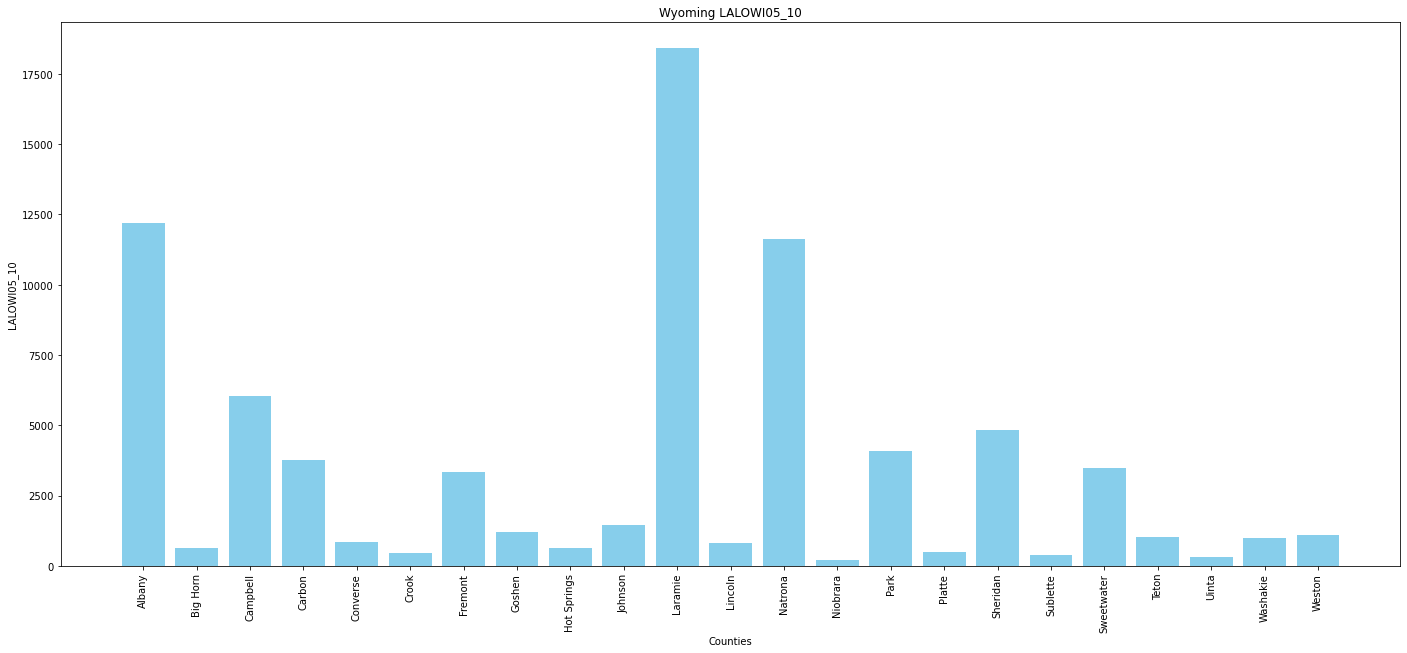

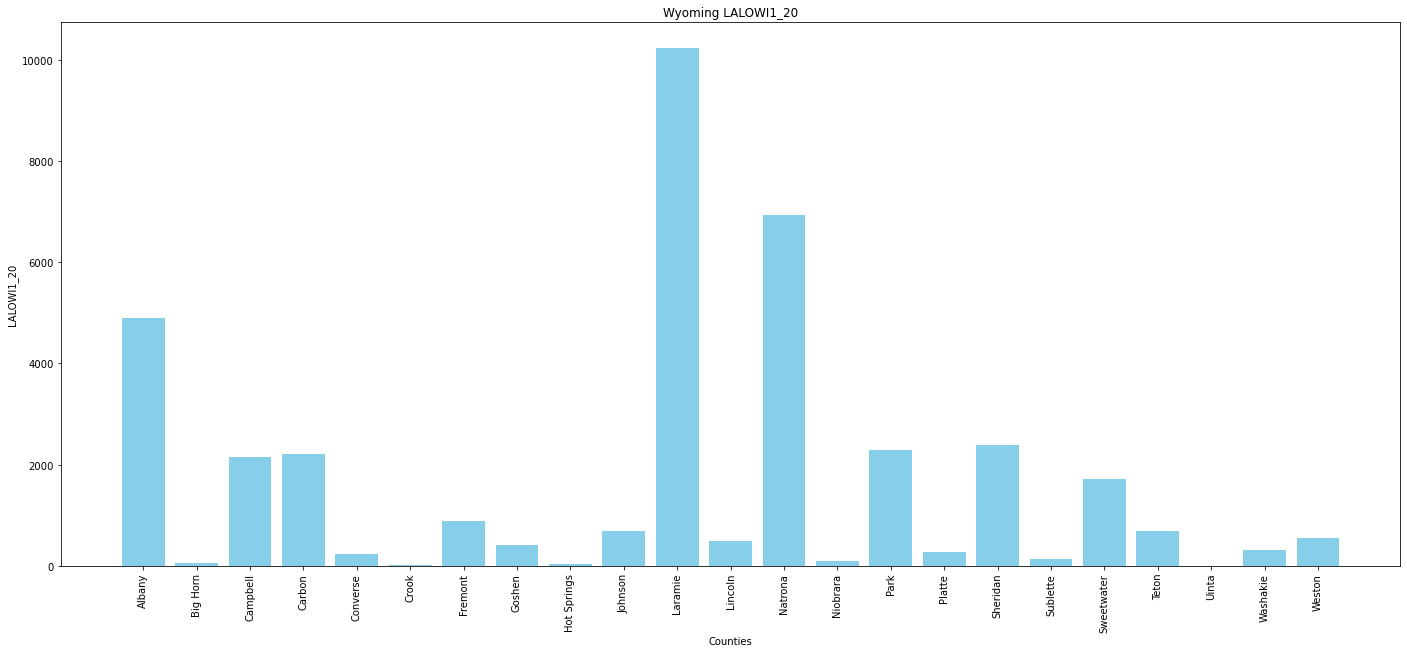

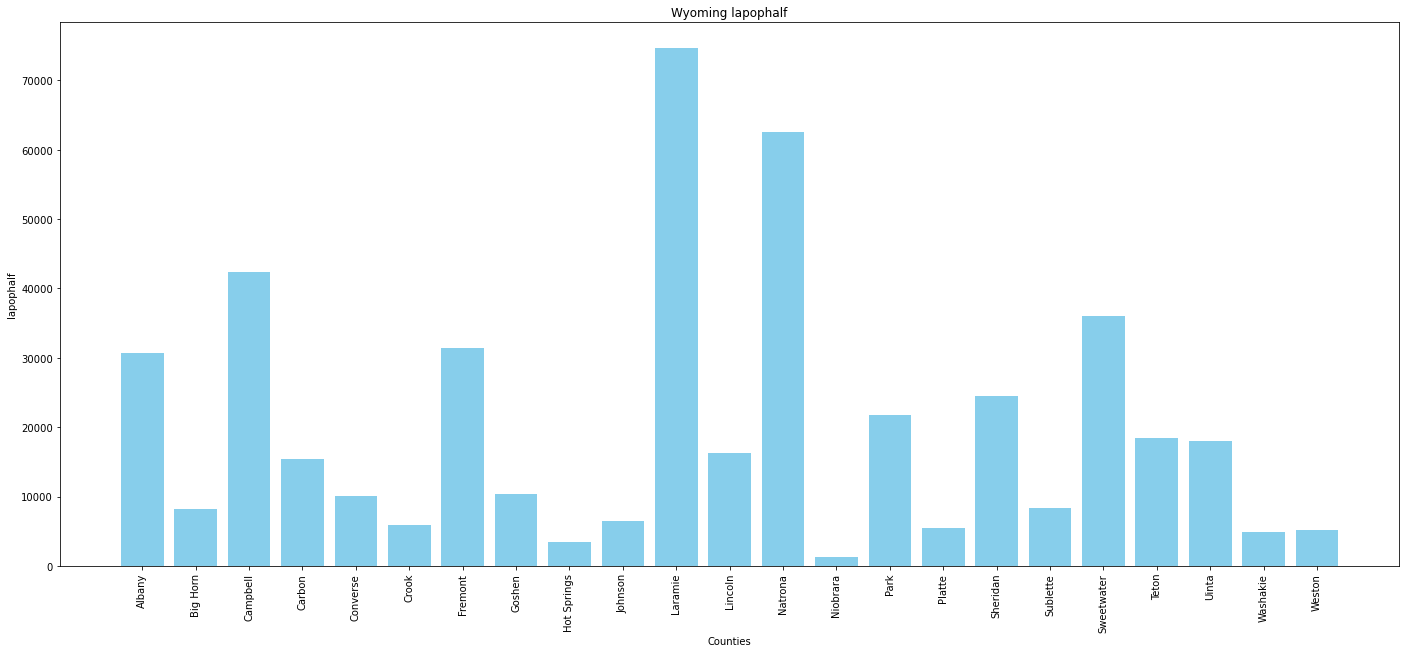

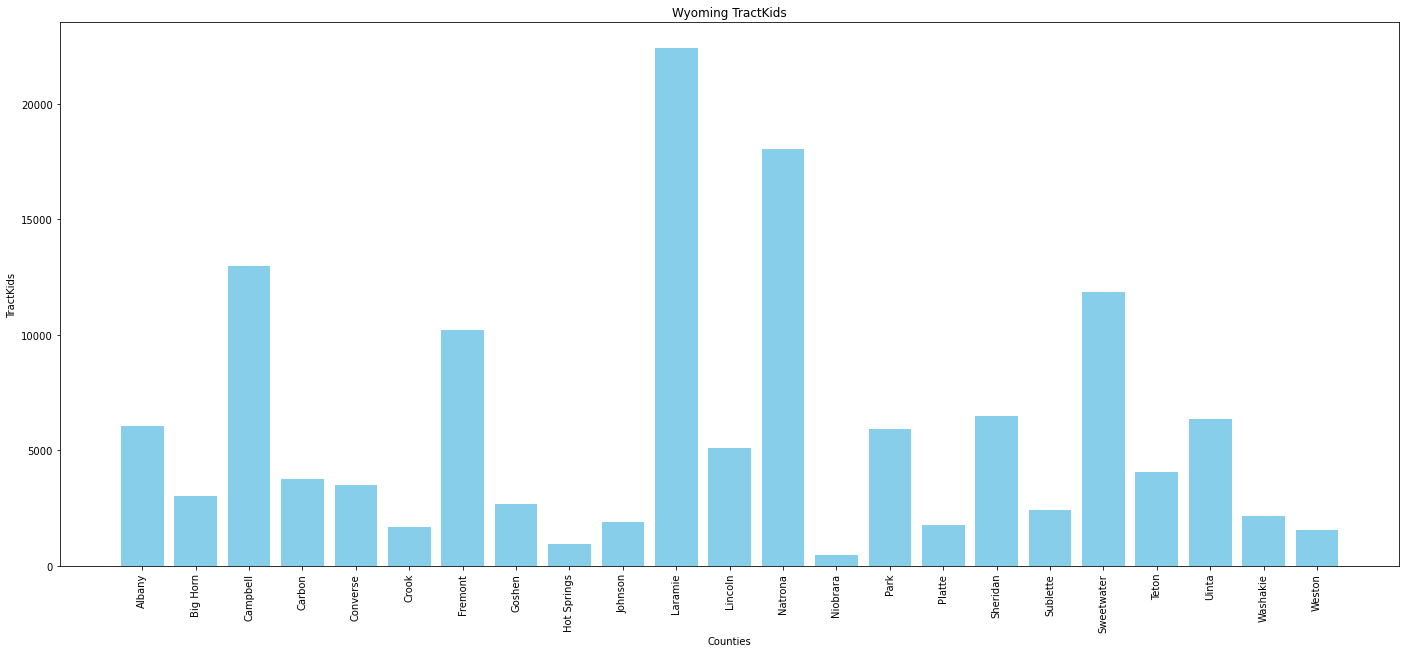

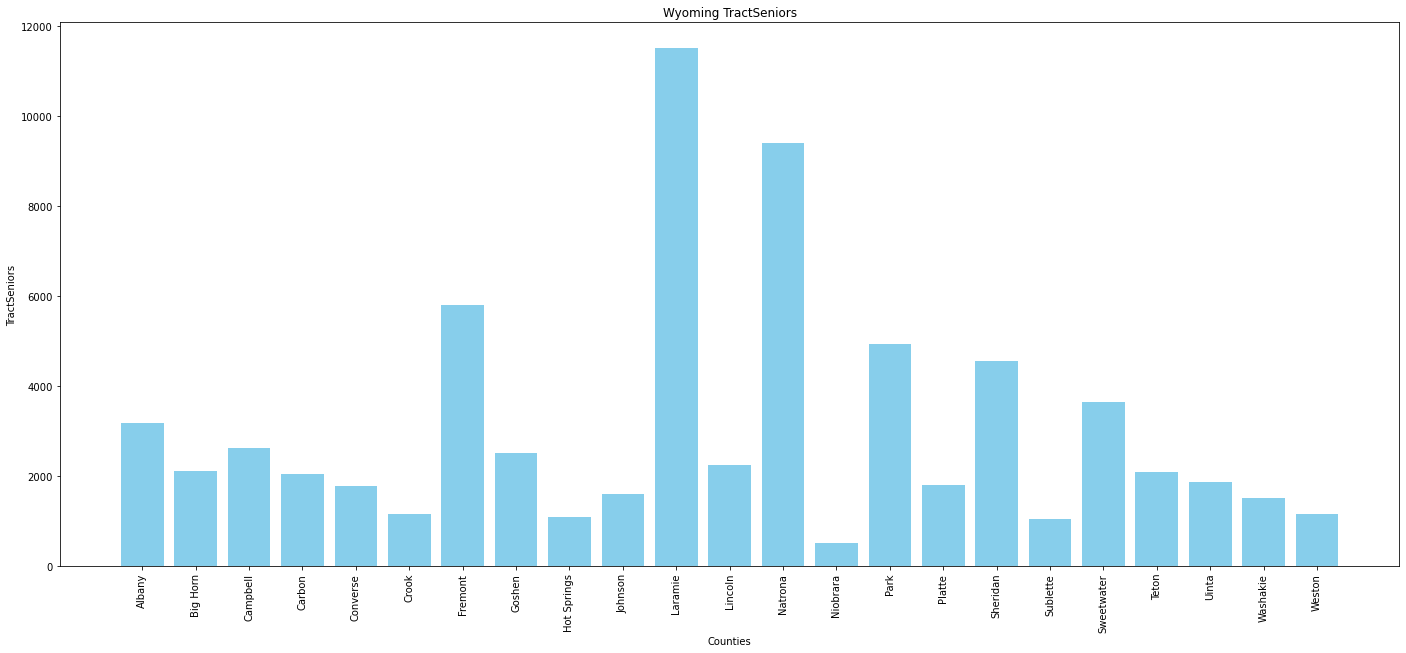

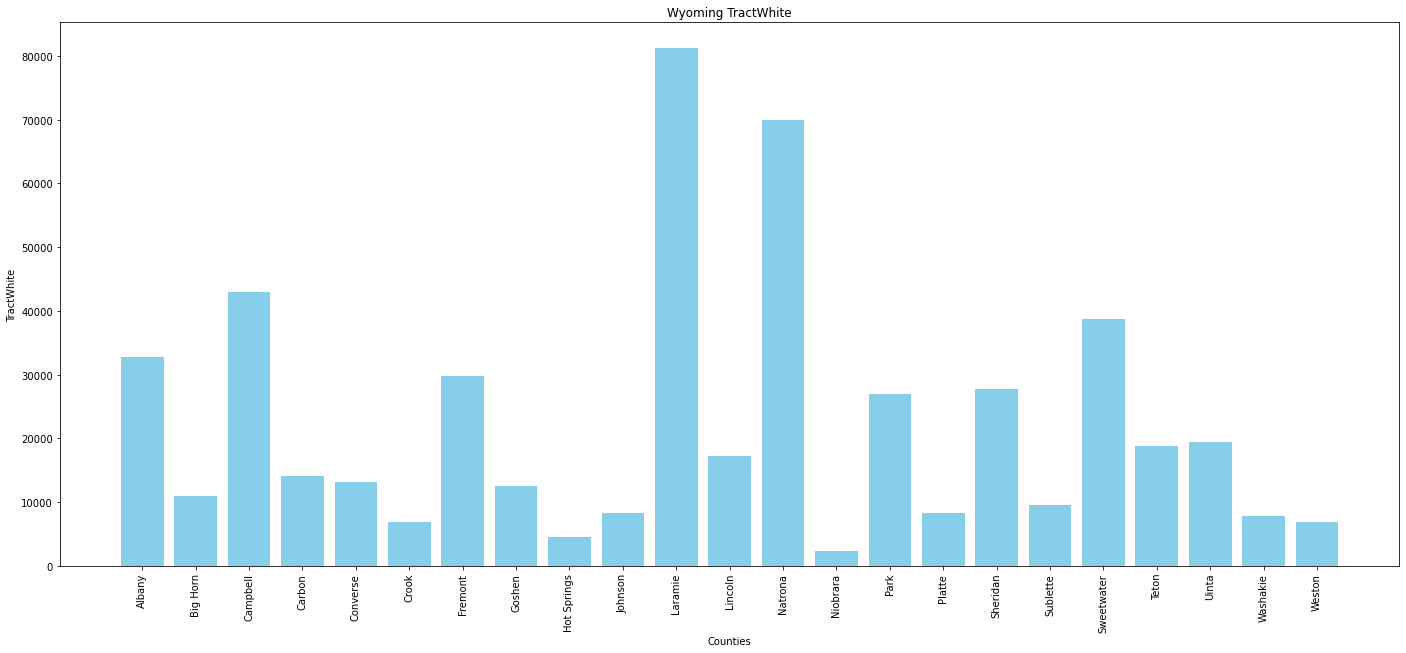

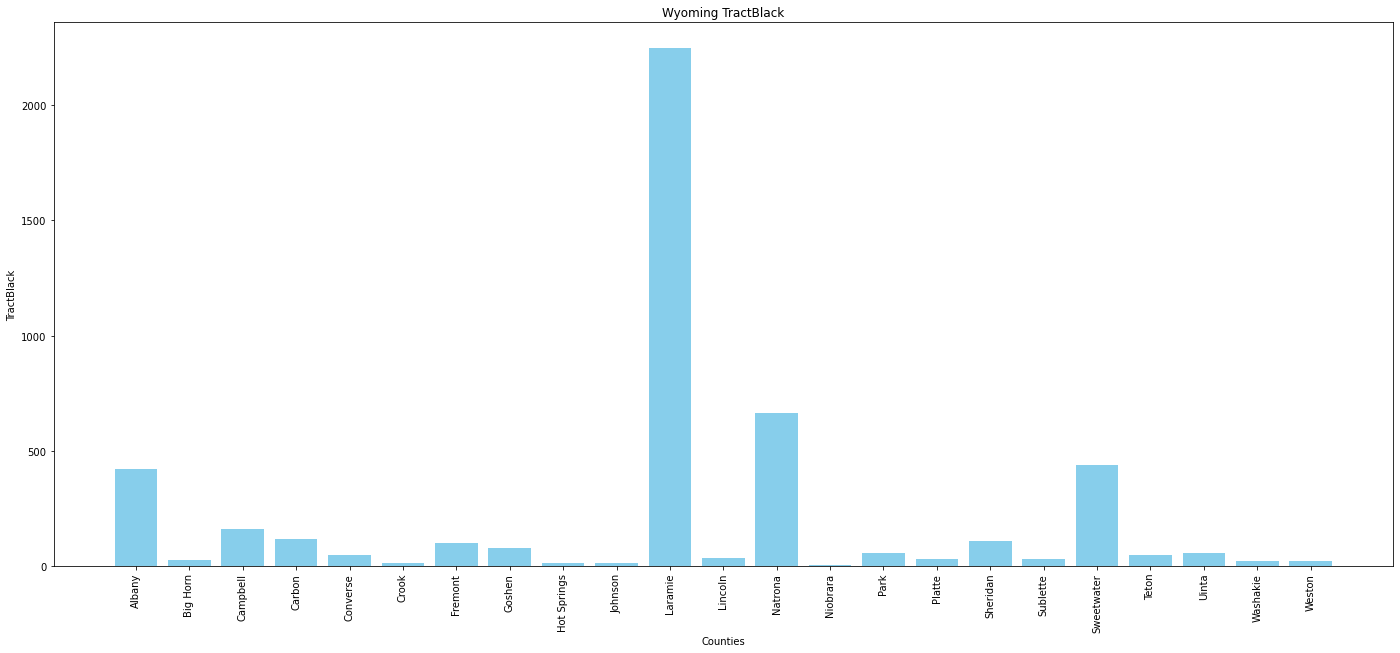

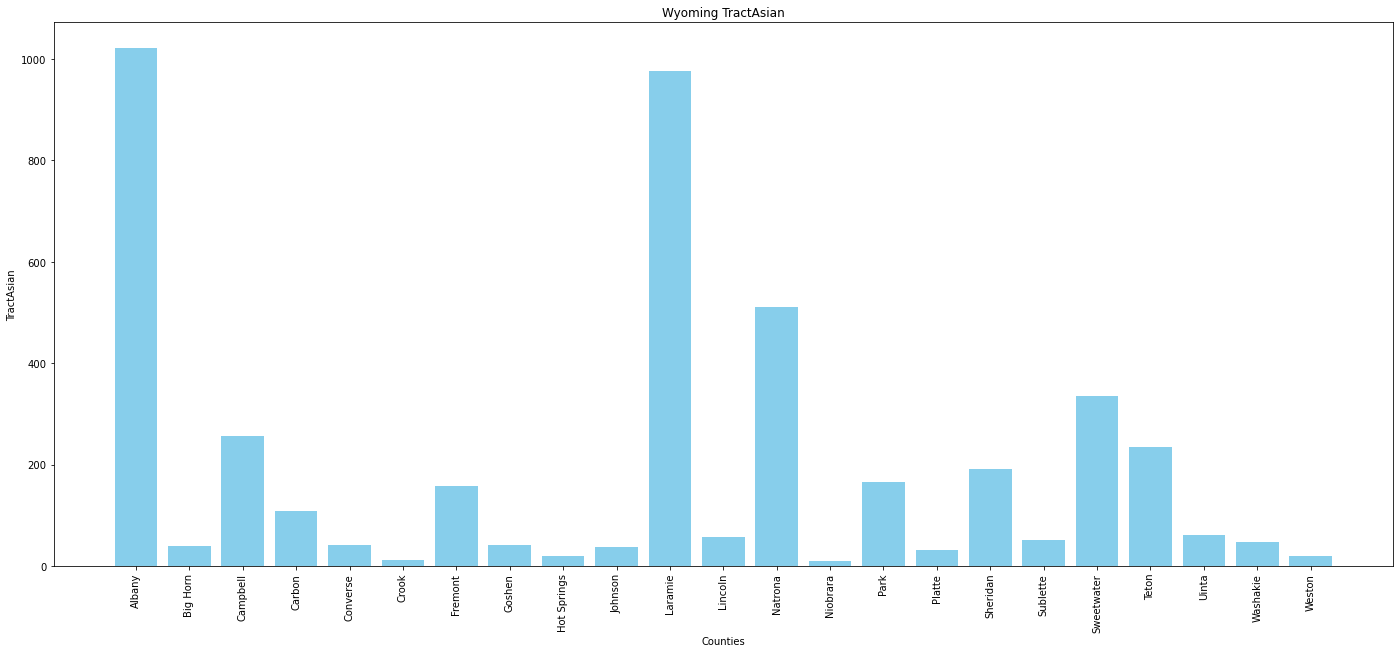

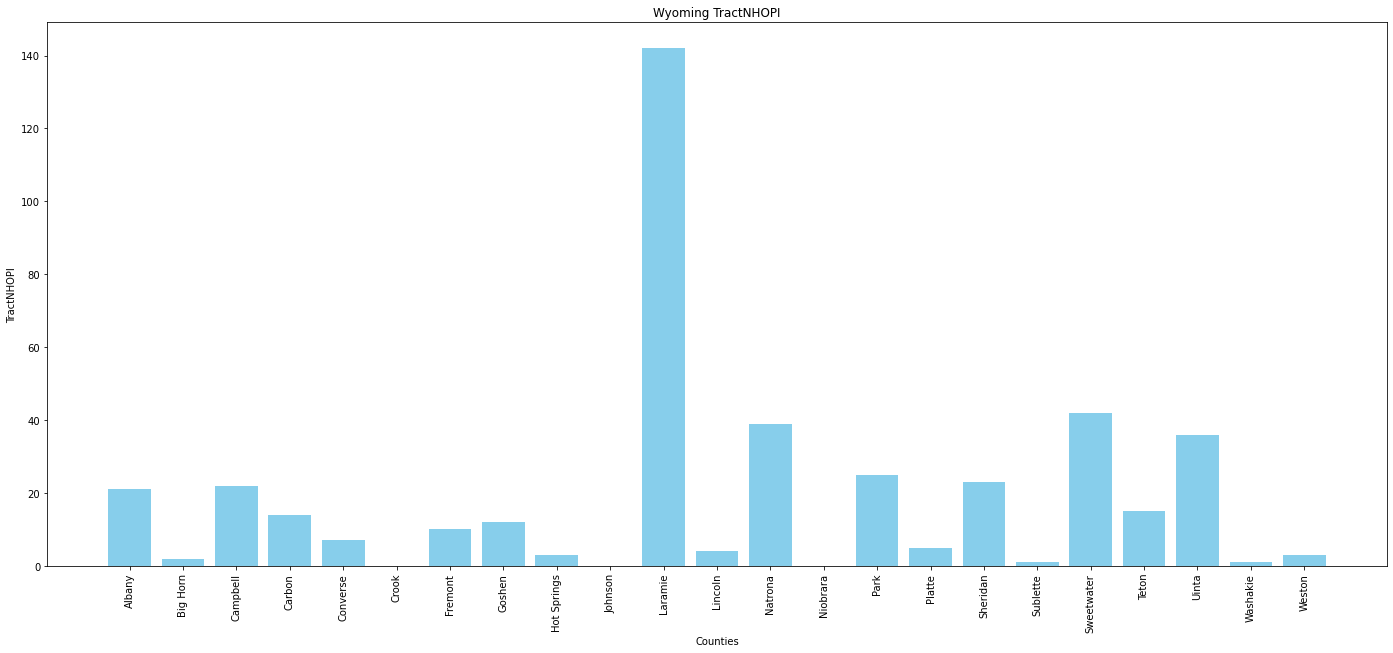

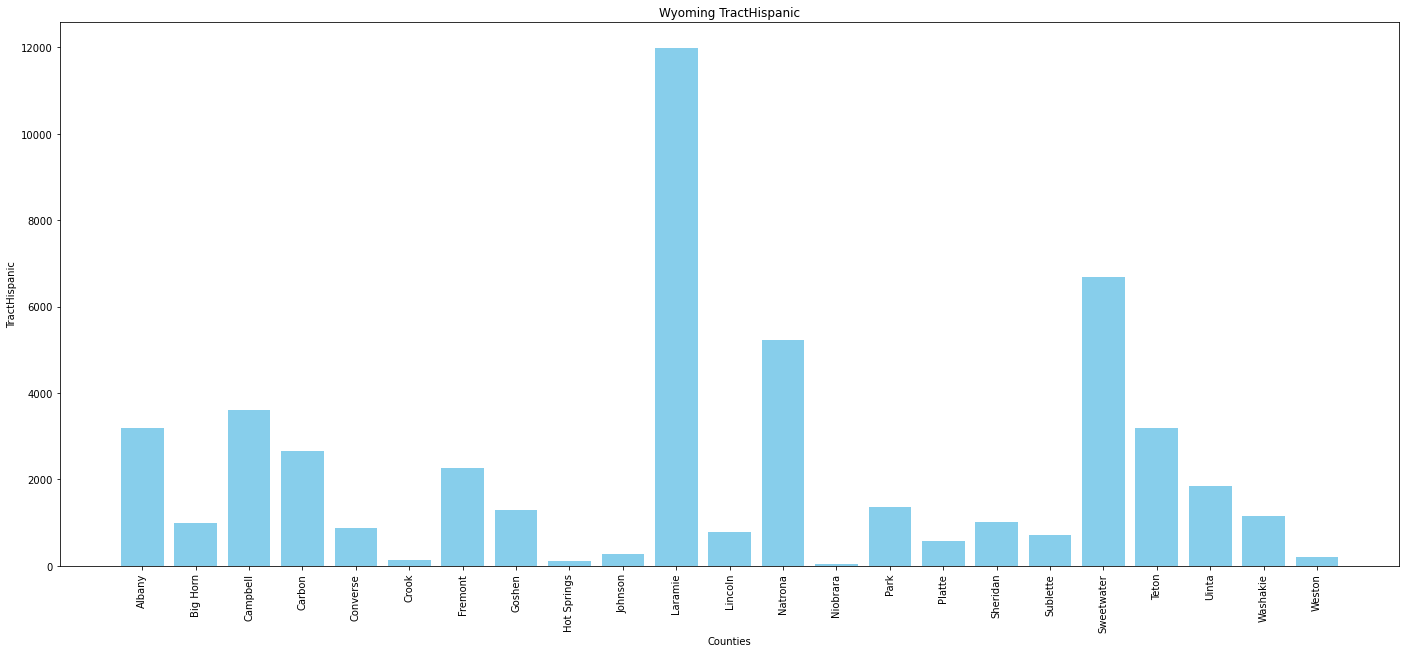

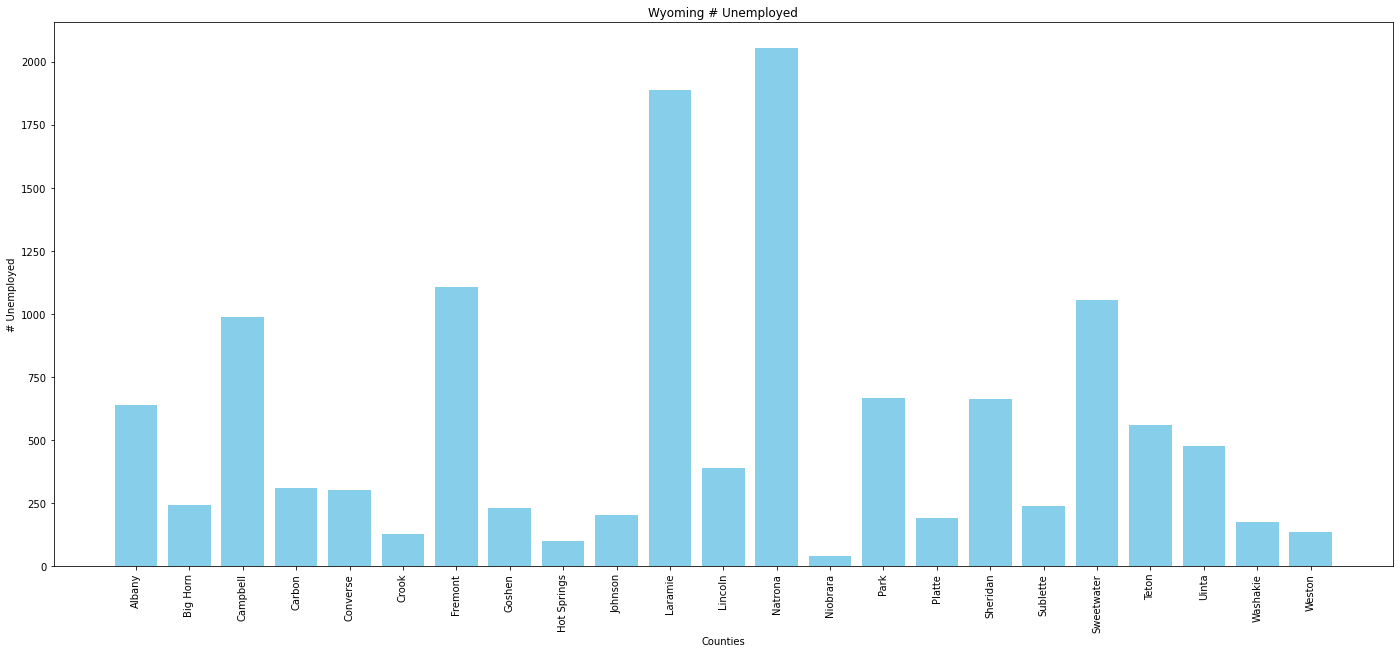

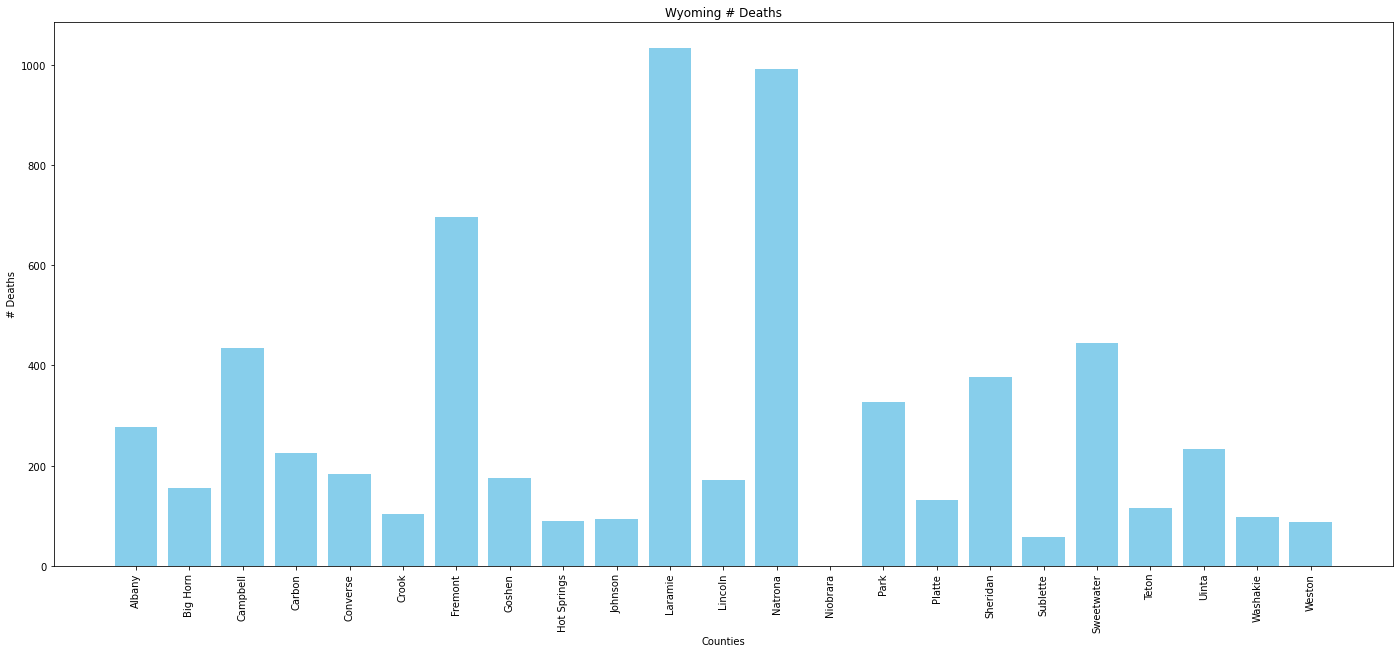

In [65]:
categories = ["POP2010", "OHU2010", "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20", 
              "LILATracts_Vehicle", "LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10", "LALOWI05_10", 
             "LALOWI1_20", "lapophalf", "TractKids", "TractSeniors", "TractWhite", 
             "TractBlack", "TractAsian", "TractNHOPI", "TractHispanic", "# Unemployed", 
              "# Deaths"]

for category in categories:
    f, ax = plt.subplots(figsize=(24,10))
    y_axis = state[category].tolist()
    plt.bar(x_axis, y_axis, color='skyblue', align='center')
    tick_loc = [value for value in x_axis]
    plt.xticks(tick_loc, counties, rotation=90)
    plt.xlabel("Counties")
    plt.ylabel(category)
    plt.title(f"{the_state} {category}")
    plt.savefig(f'bar_graphs/{the_state}_{category}.png')
    plt.show()

In [57]:
average_df = combined_df.groupby("State").agg({"POP2010": "mean", "OHU2010": "mean", "PovertyRate": "mean", 
                                            "MedianFamilyIncome": "mean", "LILATracts_1And10": "mean", 
                                            "LILATracts_halfAnd10": "mean", "LILATracts_1And20": "mean", 
                                             "LILATracts_Vehicle": "mean", "LAPOP1_10": "mean", 
                                            "LAPOP05_10": "mean", "LAPOP1_20": "mean", "LAPOP1_10": "mean", 
                                           "LALOWI1_10": "mean", "LALOWI05_10": "mean", "LALOWI1_20": "mean",
                                           "lapophalf": "mean", "TractKids": "mean", "TractSeniors": "mean",
                                           "TractWhite": "mean", "TractBlack": "mean", "TractAsian": "mean", 
                                           "TractNHOPI": "mean", "TractAIAN": "mean", "TractOMultir": "mean", 
                                           "TractHispanic": "mean", "TractHUNV": "mean", "TractSNAP": "mean", 
                                           "# Deaths": "mean", "Years of Potential Life Lost Rate": "mean", 
                                            "% Obese": "mean", "% Fair/Poor": "mean", "# Diabetics": "mean", 
                                               "# Violent Crimes": "mean", "# Unemployed": "mean", 
                                            "% Children in Poverty": "mean", }).round(0)

average_df




,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,LAPOP1_10,LAPOP05_10,...,TractHUNV,TractSNAP,# Deaths,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty
State,,,,,,,,,,,,,,,,,,,,,
Alabama,71339.0,28116.0,22.0,47557.0,4.0,6.0,3.0,4.0,17290.0,31453.0,...,1781.0,4352.0,1123.0,10481.0,36.0,22.0,1138.0,311.0,1955.0,32.0
Alaska,29909.0,10875.0,13.0,73552.0,1.0,2.0,1.0,1.0,10149.0,16806.0,...,949.0,1052.0,441.0,8813.0,31.0,16.0,379.0,312.0,962.0,18.0
Arizona,426134.0,158733.0,21.0,49773.0,17.0,38.0,15.0,17.0,111680.0,257711.0,...,10899.0,21576.0,4687.0,8845.0,29.0,20.0,3890.0,1664.0,12879.0,29.0
Arkansas,38879.0,15294.0,22.0,45703.0,2.0,3.0,2.0,2.0,9317.0,17280.0,...,960.0,2233.0,595.0,10011.0,36.0,23.0,567.0,186.0,926.0,31.0
California,642310.0,216853.0,17.0,67871.0,9.0,38.0,9.0,11.0,85983.0,291401.0,...,16980.0,19010.0,5678.0,6351.0,24.0,17.0,4189.0,2665.0,20399.0,22.0
Colorado,78581.0,30826.0,14.0,63593.0,3.0,7.0,2.0,2.0,17787.0,44962.0,...,1793.0,2675.0,860.0,6664.0,21.0,13.0,510.0,254.0,1716.0,21.0
Connecticut,446762.0,171386.0,10.0,87501.0,9.0,25.0,9.0,15.0,133155.0,265537.0,...,15430.0,19685.0,4029.0,5312.0,26.0,13.0,4264.0,1473.0,13310.0,13.0
Delaware,299311.0,114099.0,13.0,68760.0,9.0,18.0,9.0,9.0,76132.0,167024.0,...,7280.0,14371.0,3641.0,7384.0,31.0,16.0,6075.0,1583.0,7631.0,20.0
District of Columbia,601723.0,266707.0,20.0,98286.0,6.0,52.0,6.0,45.0,12749.0,161902.0,...,96855.0,37777.0,7354.0,7667.0,22.0,13.0,5677.0,8160.0,26844.0,28.0


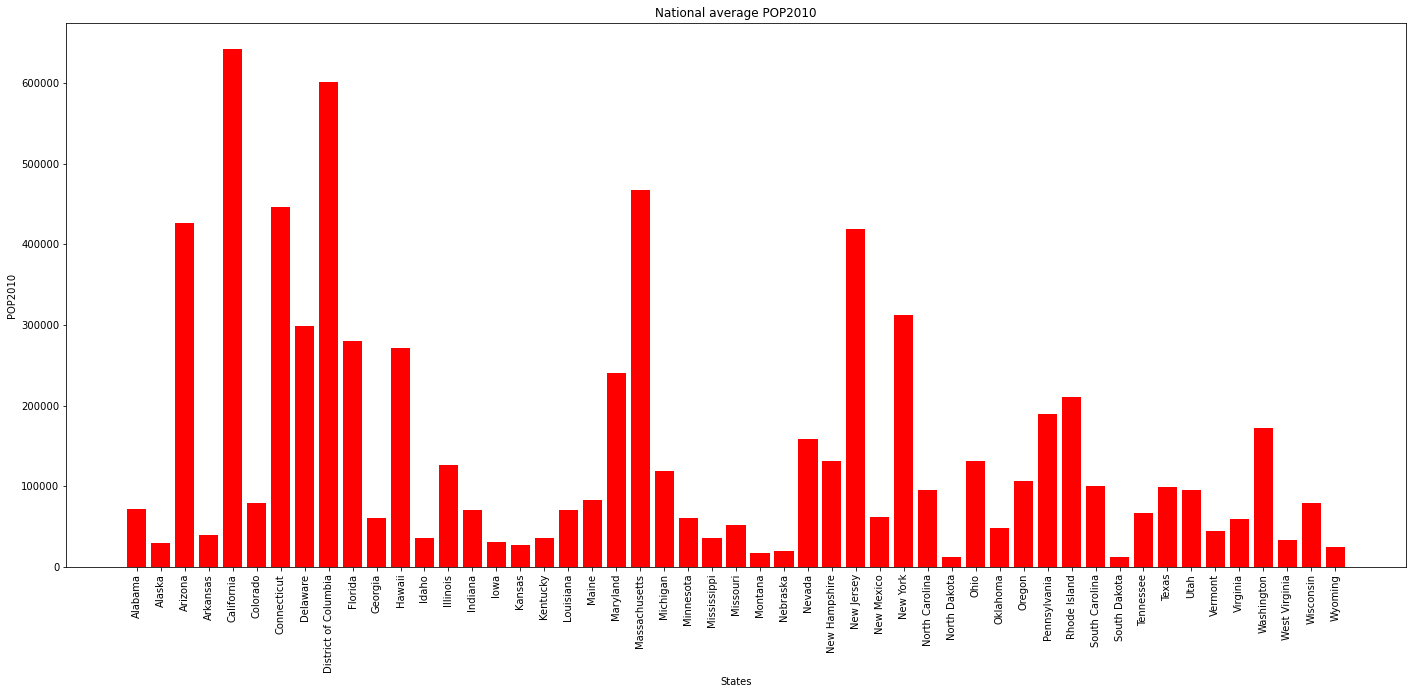

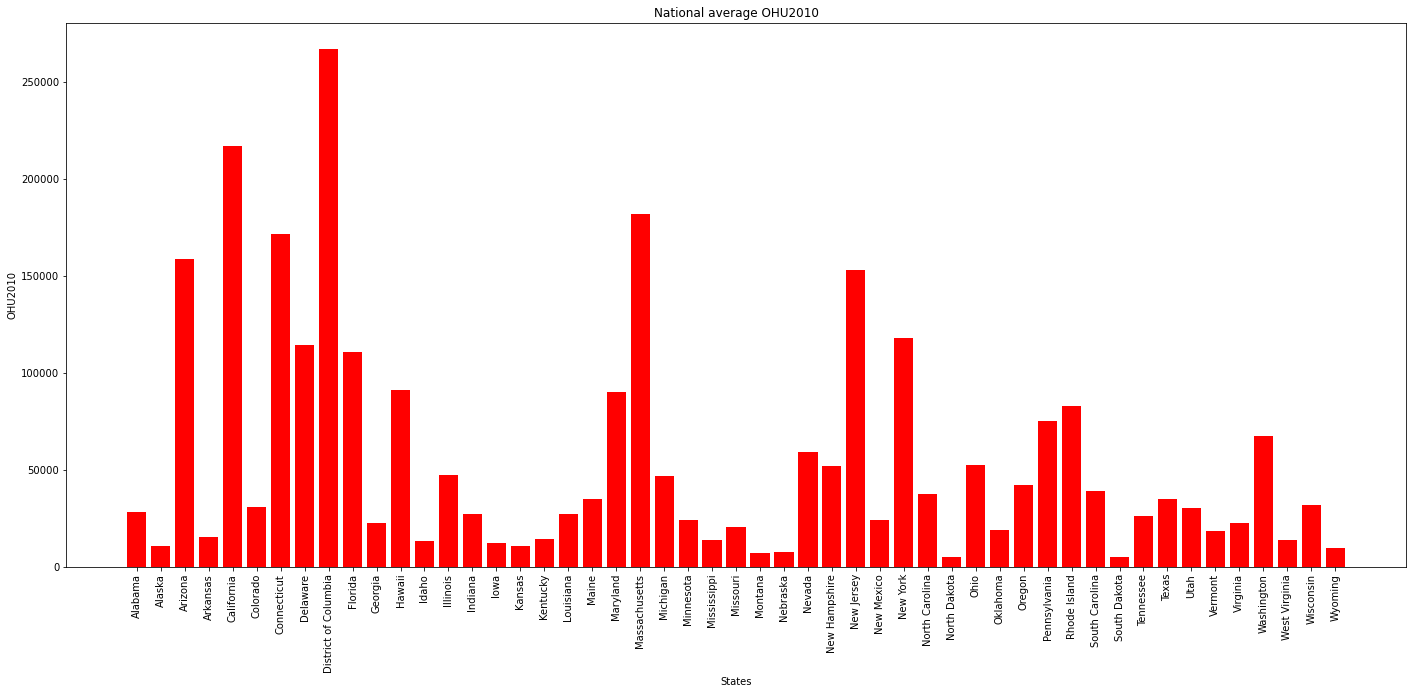

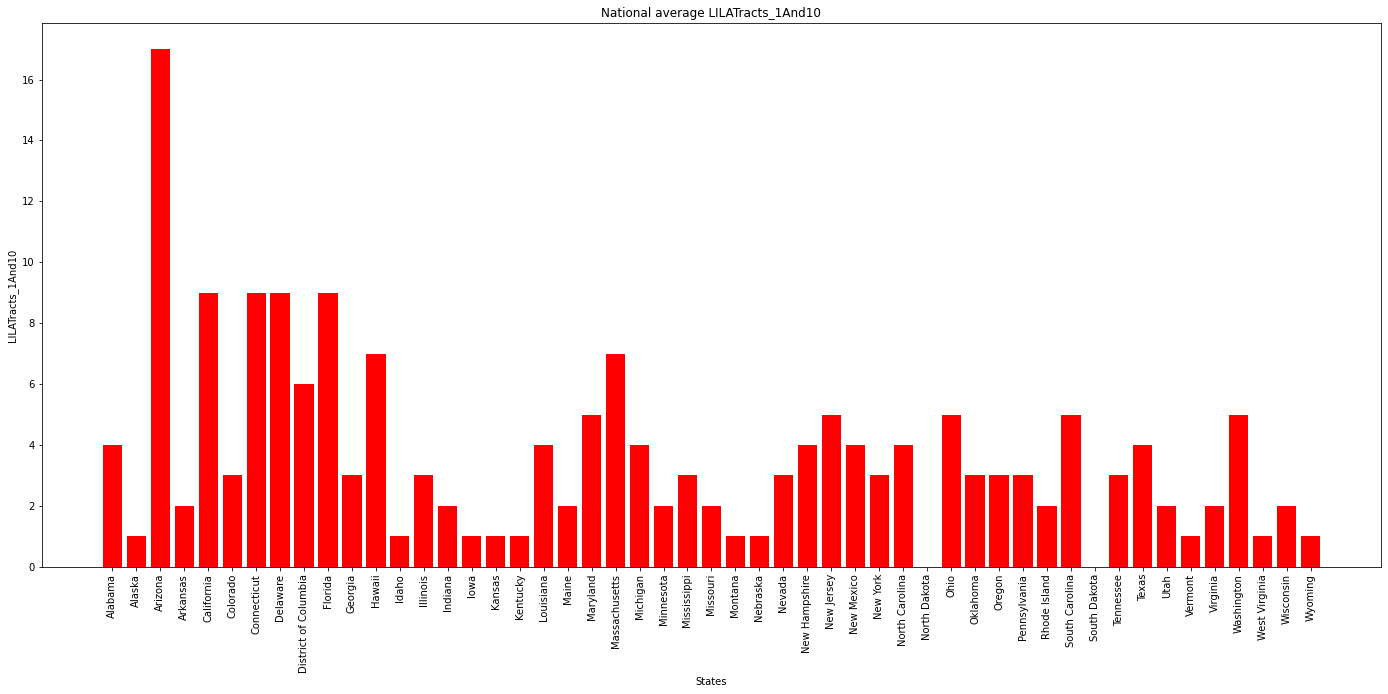

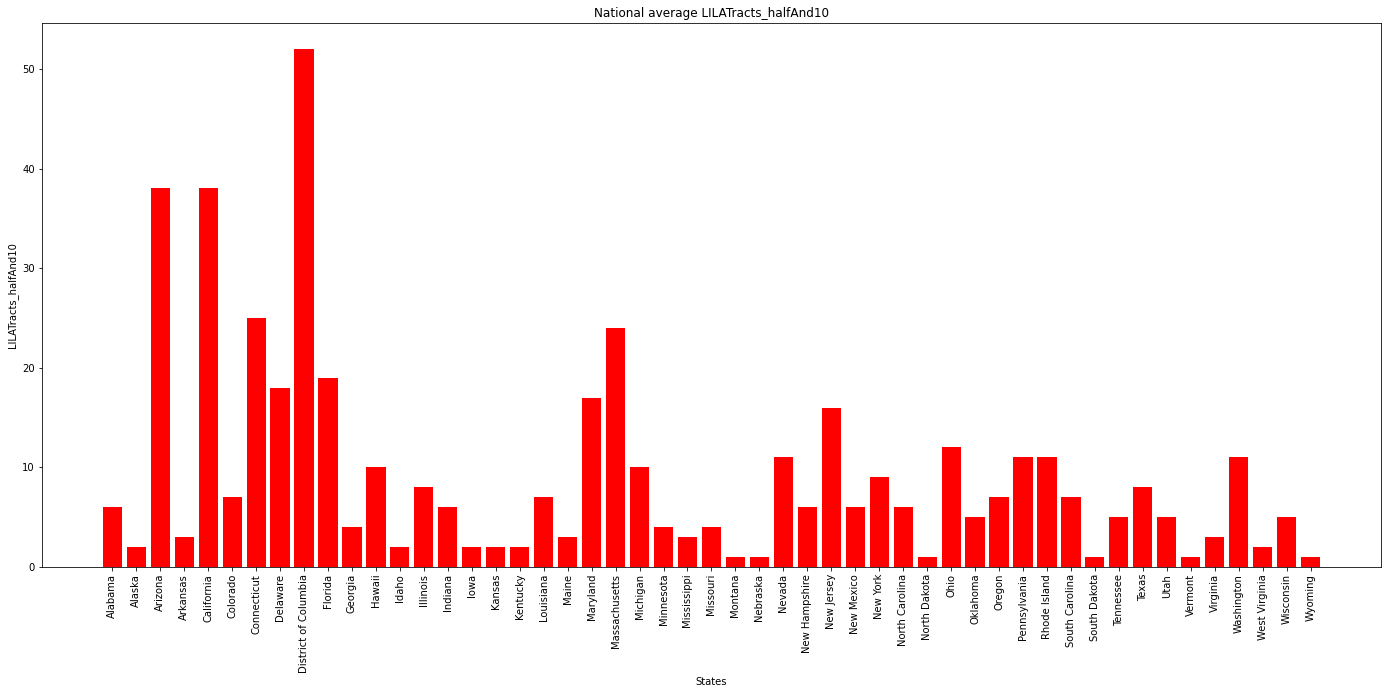

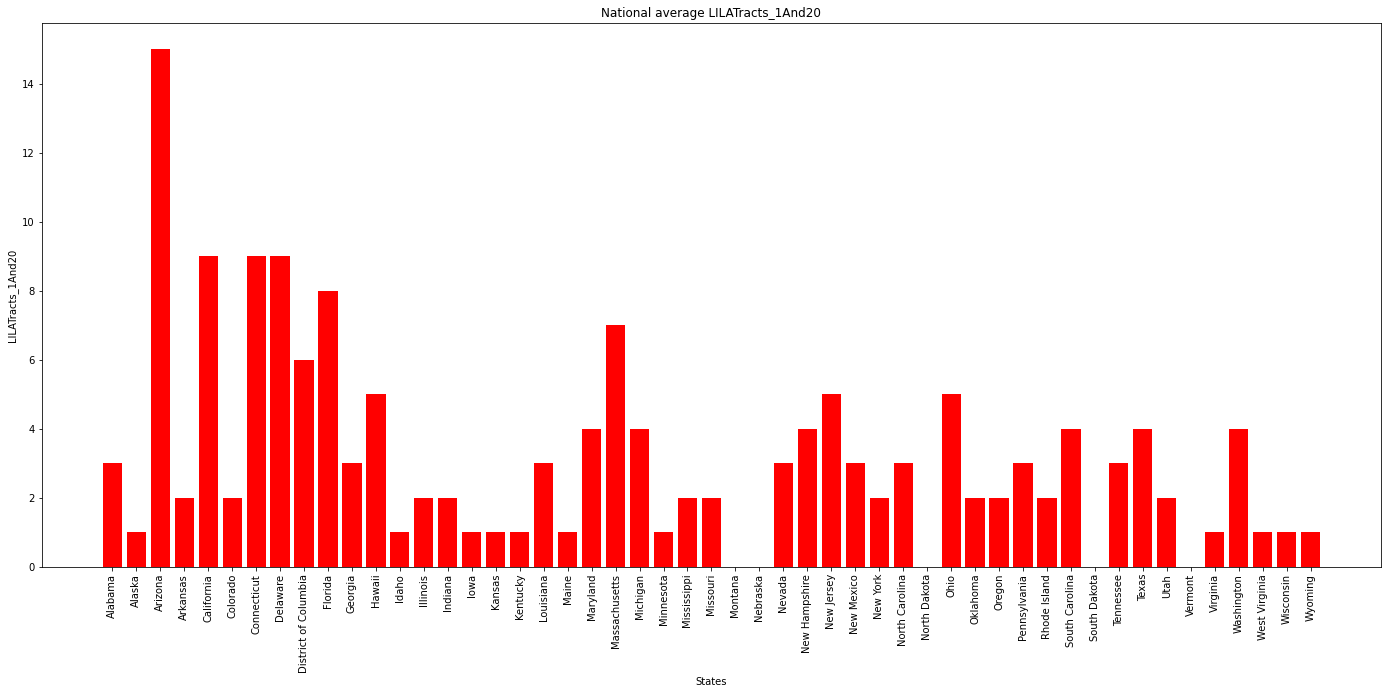

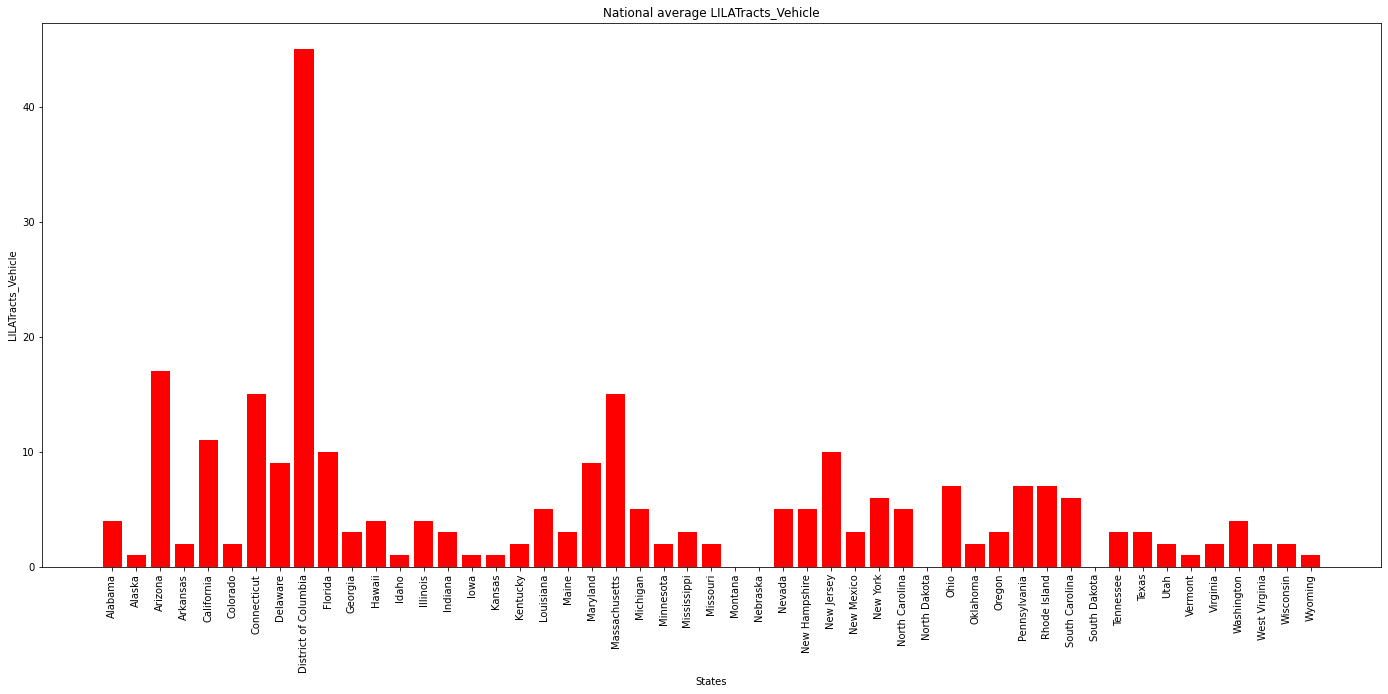

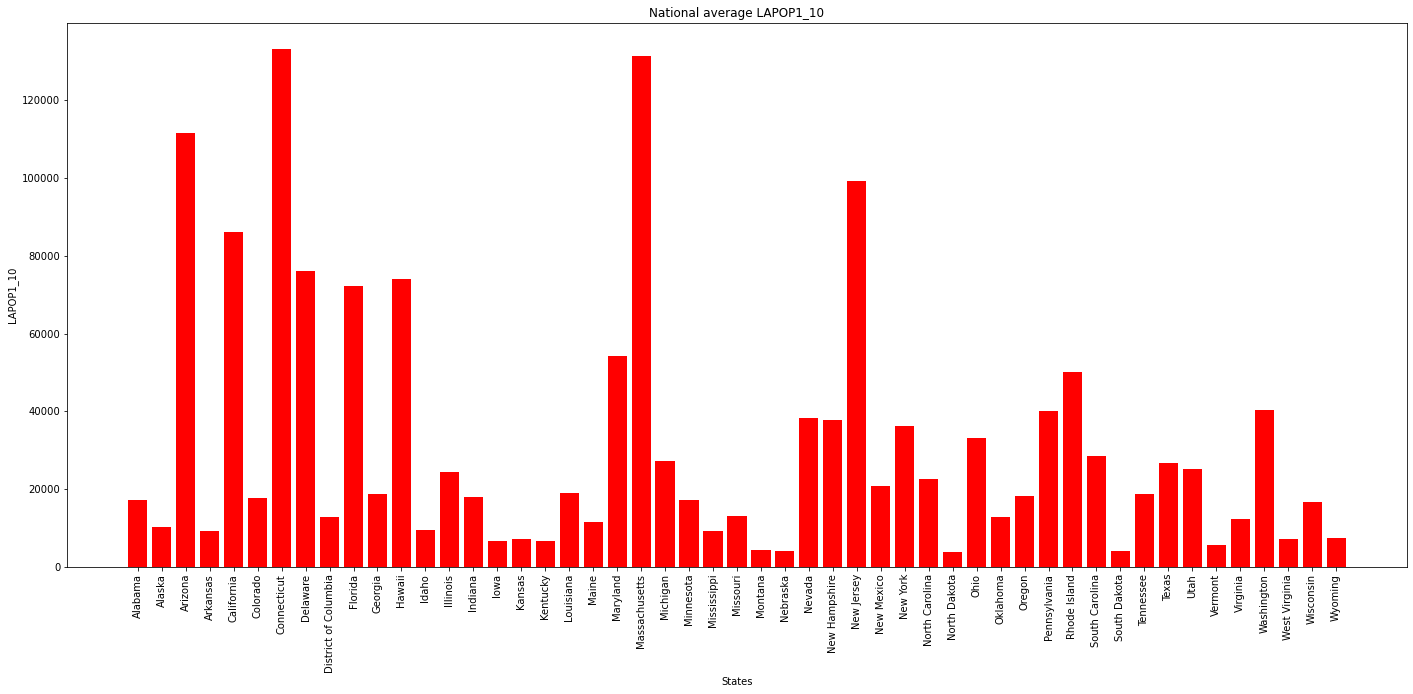

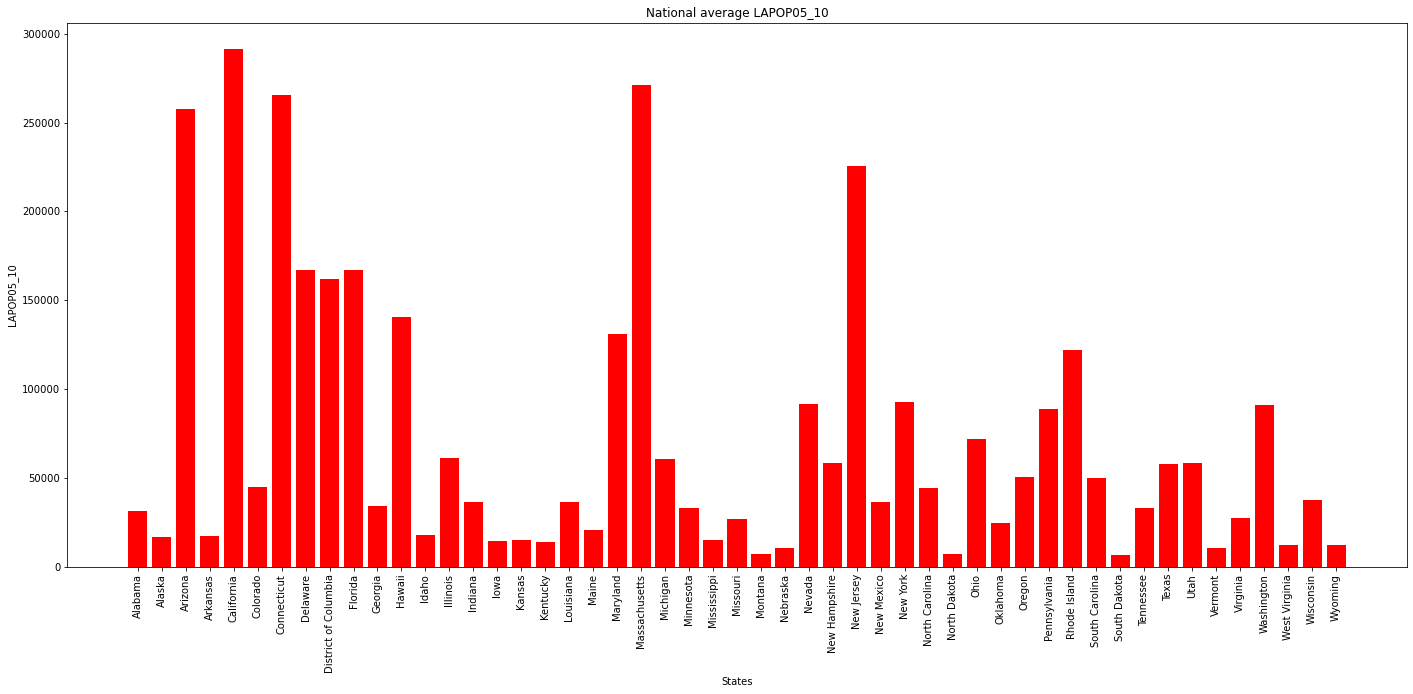

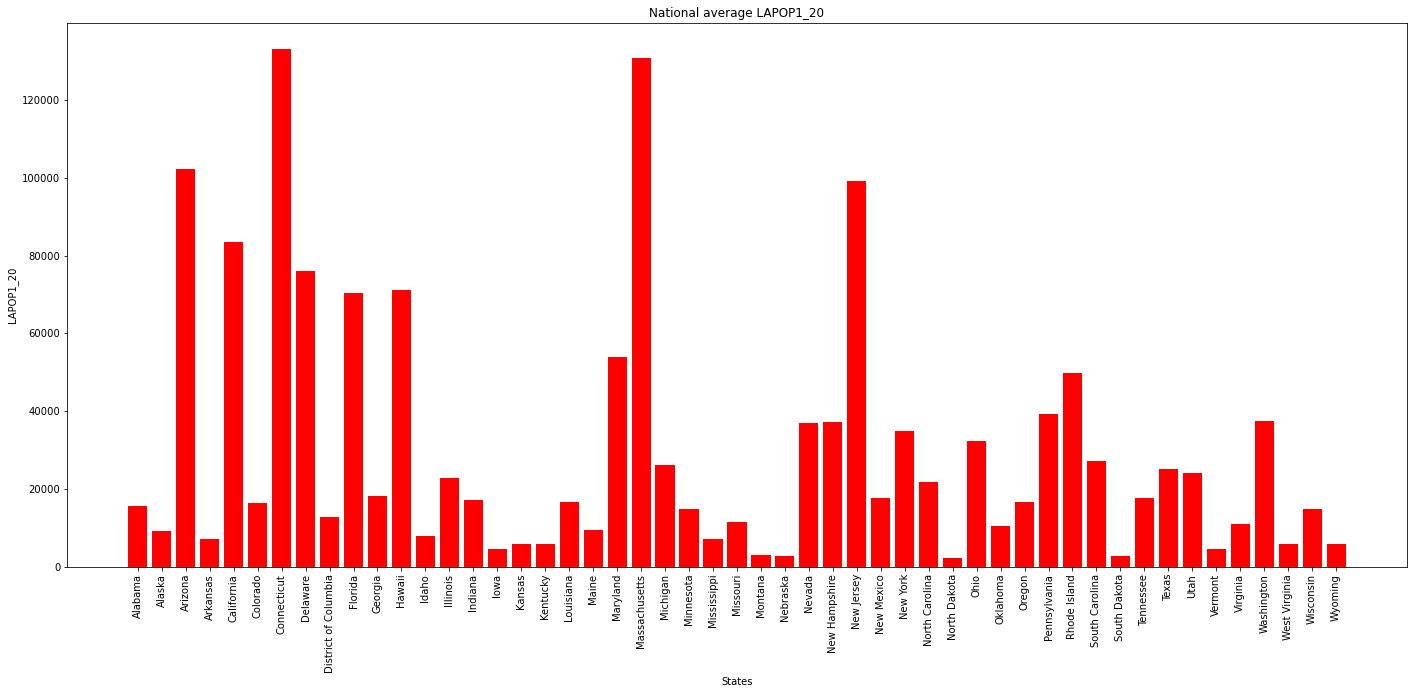

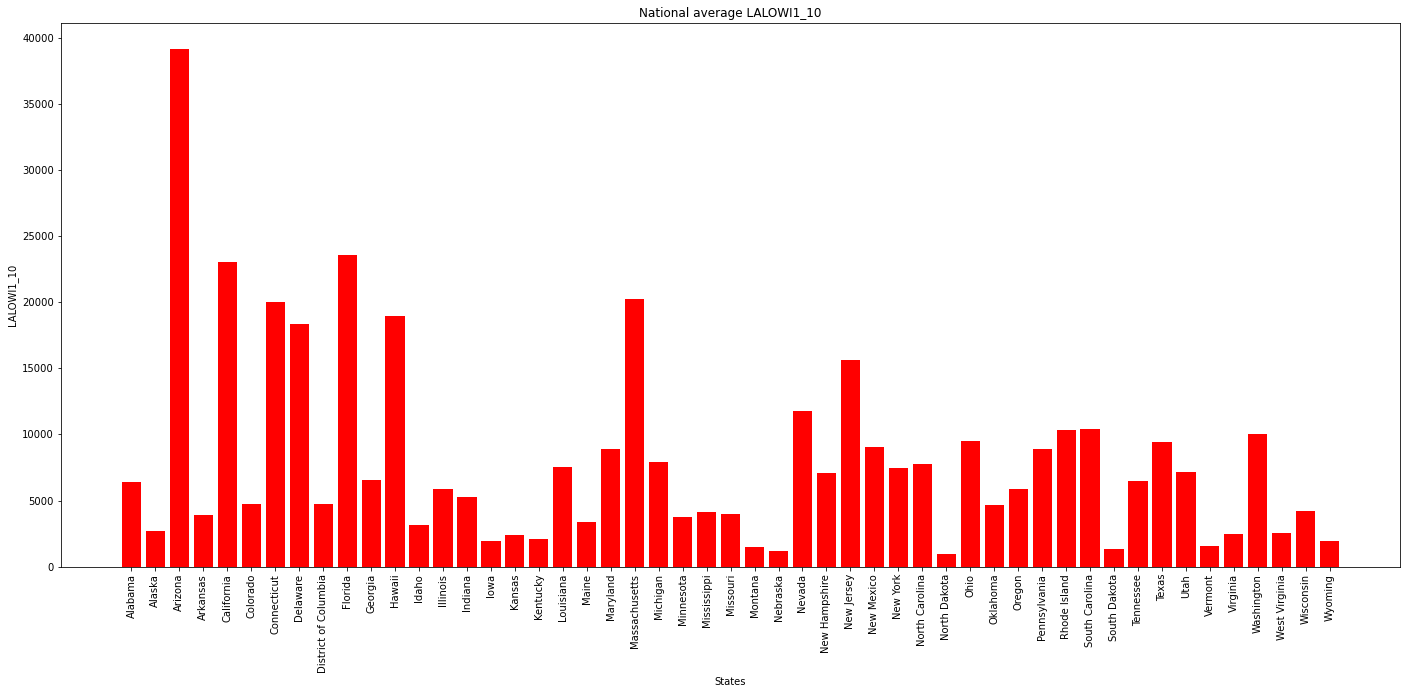

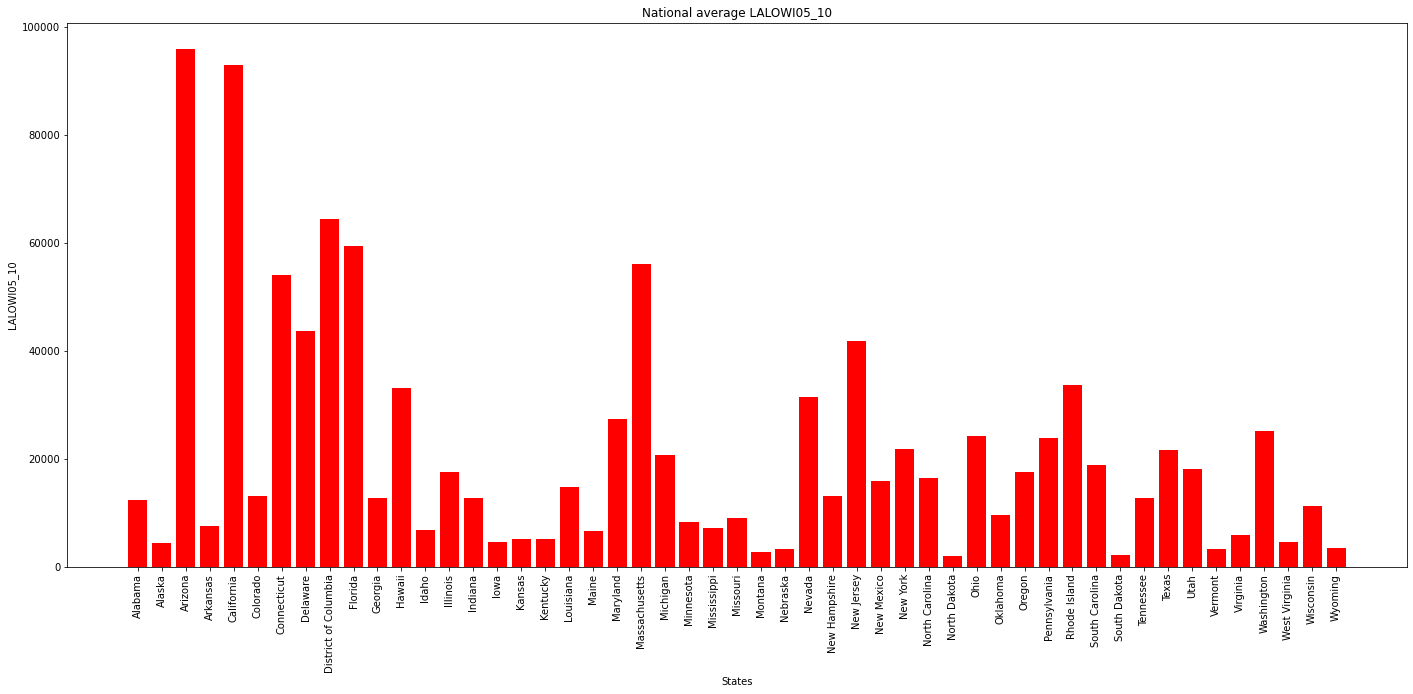

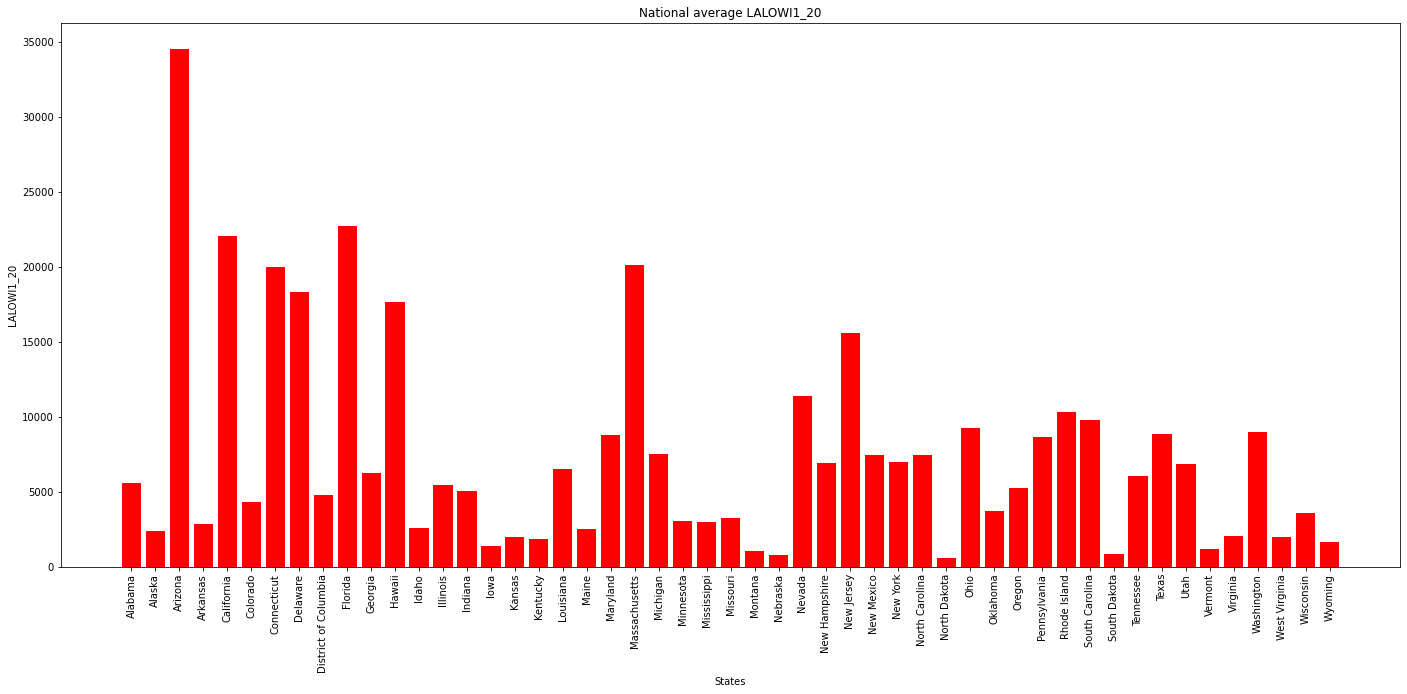

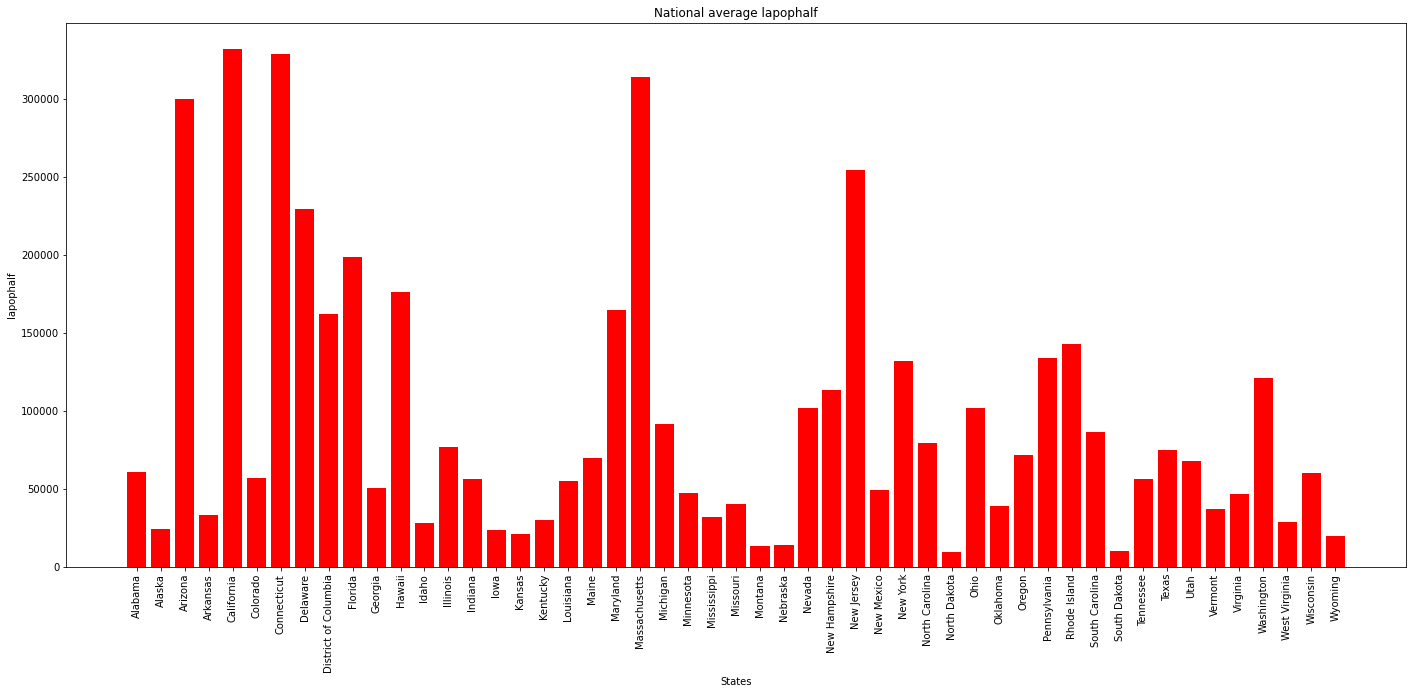

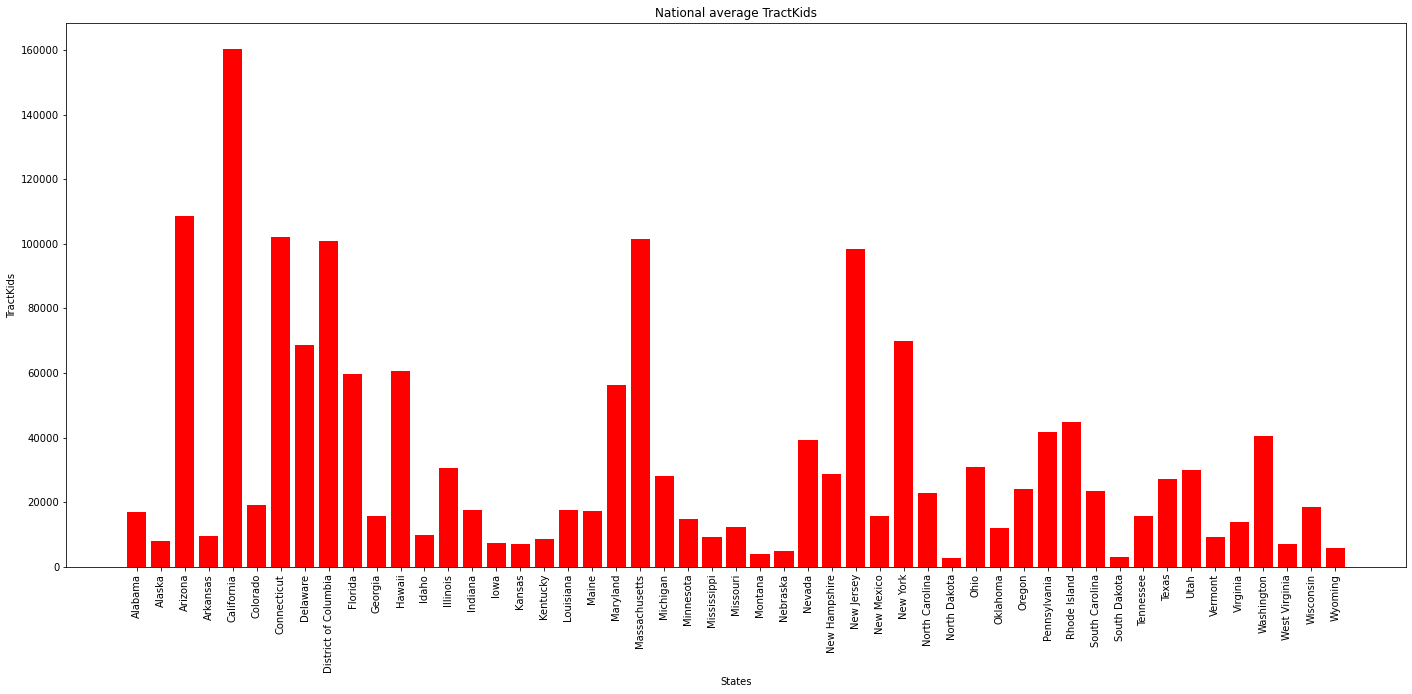

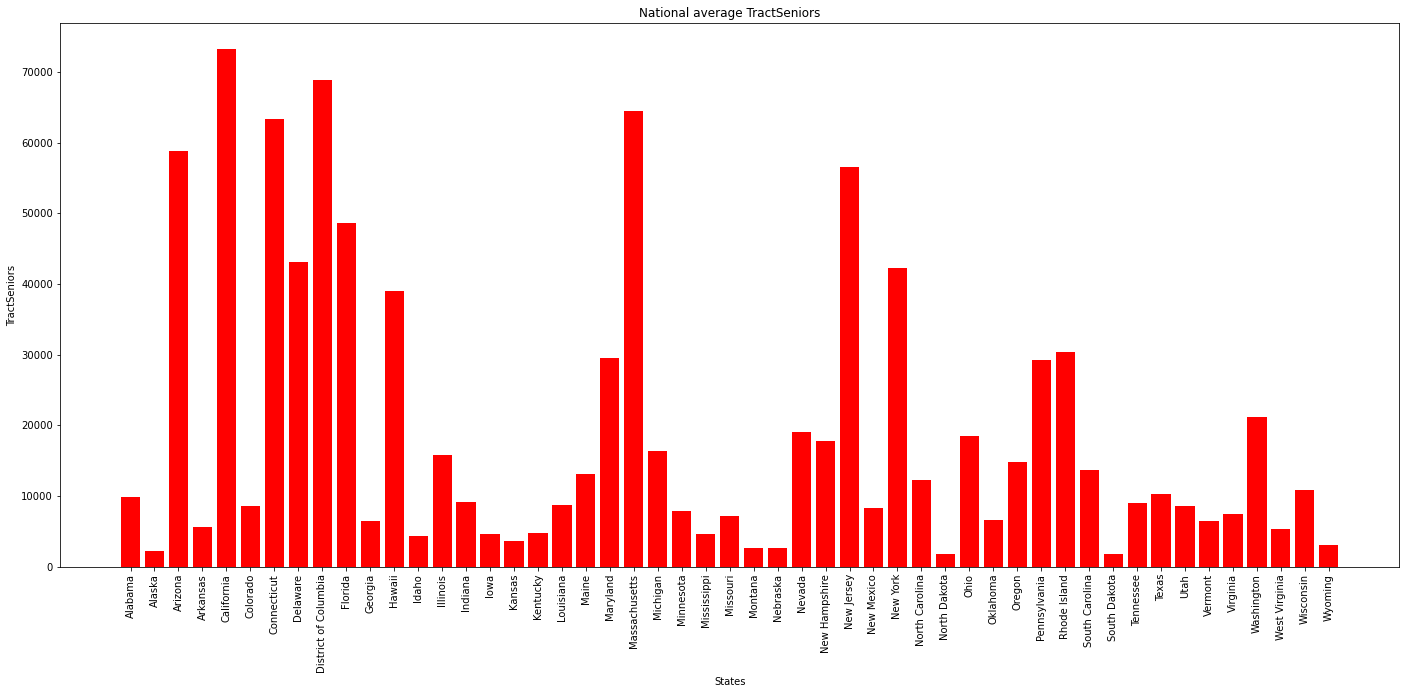

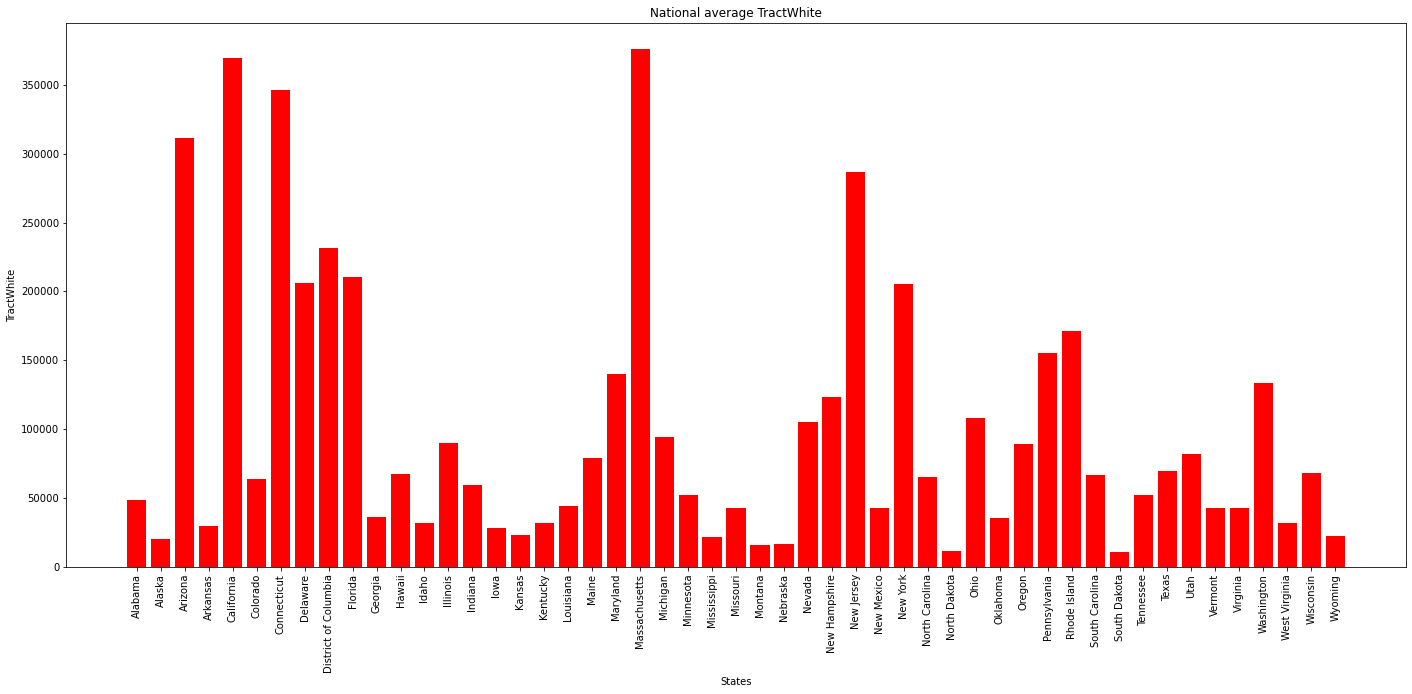

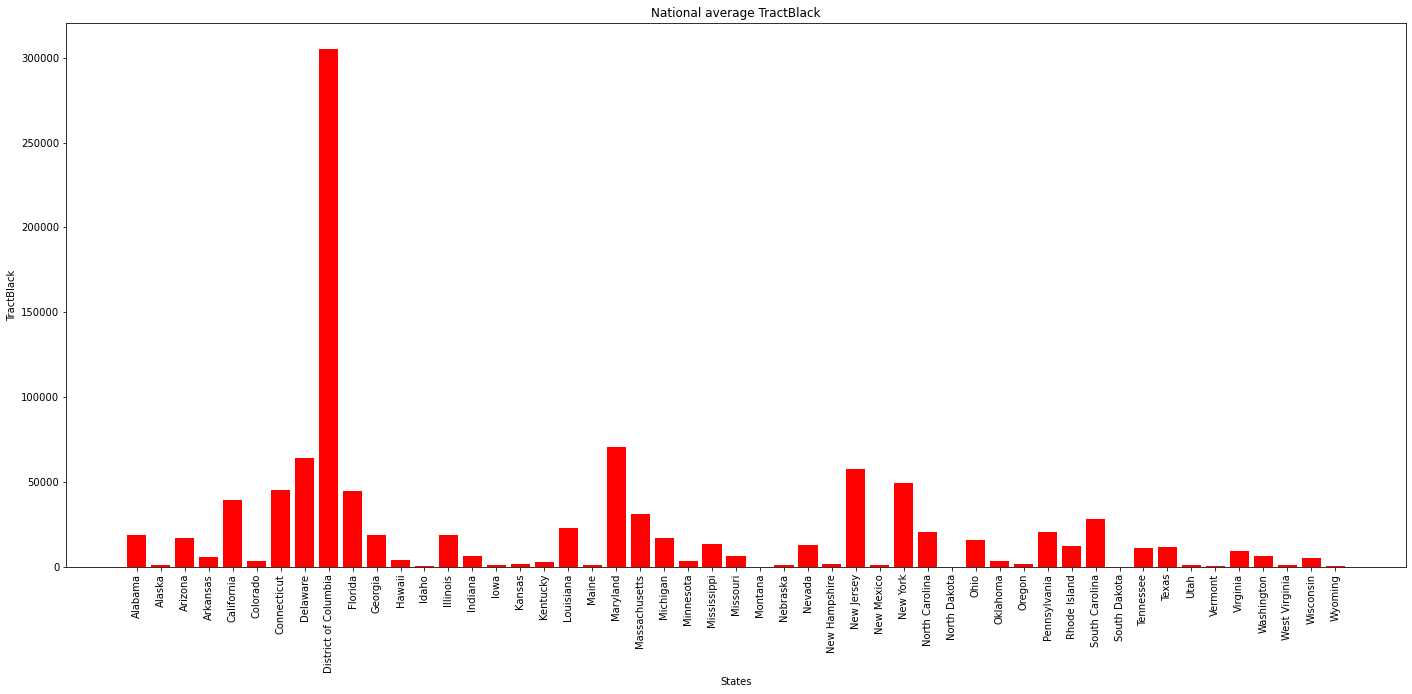

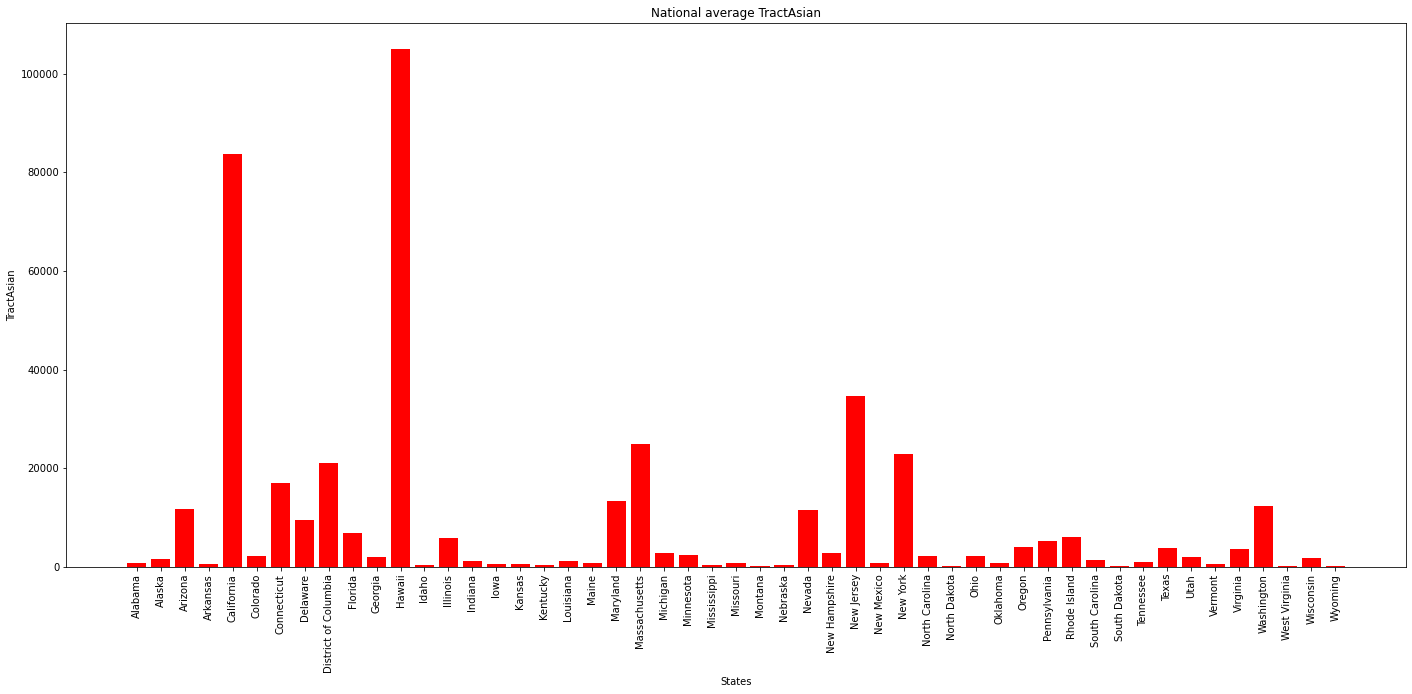

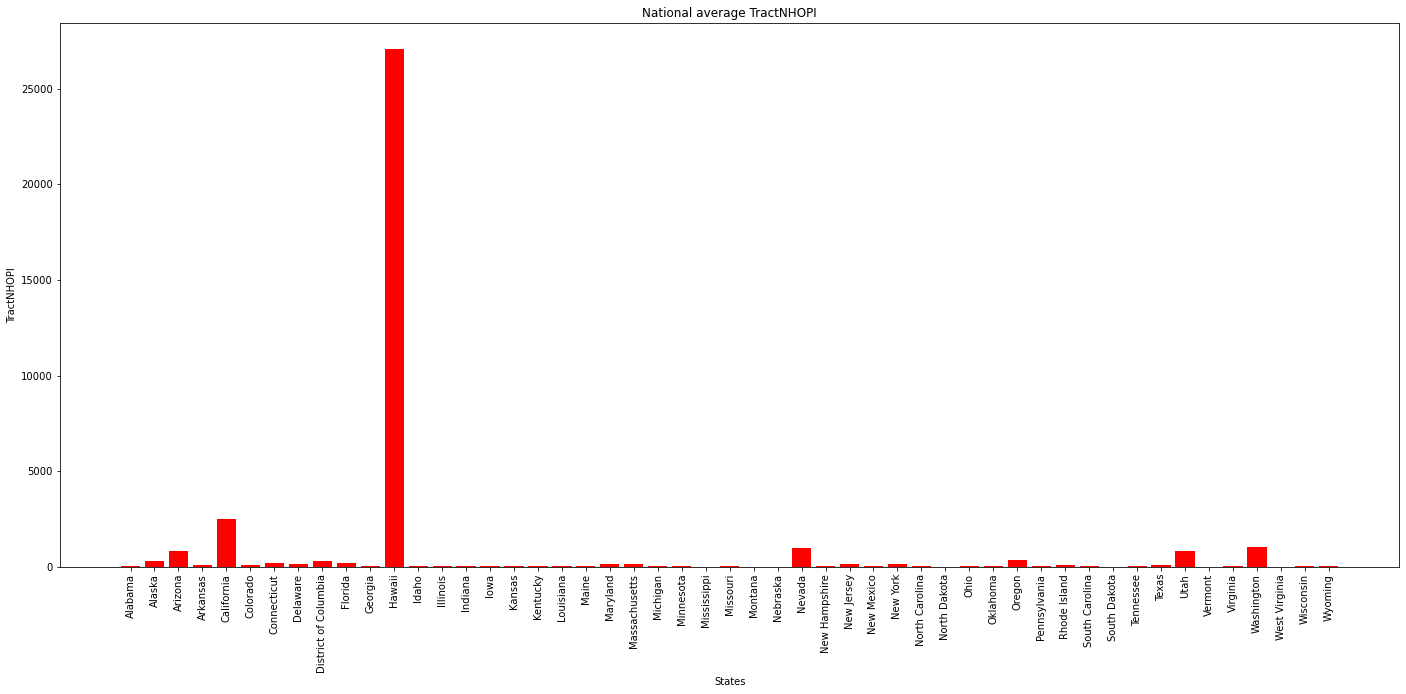

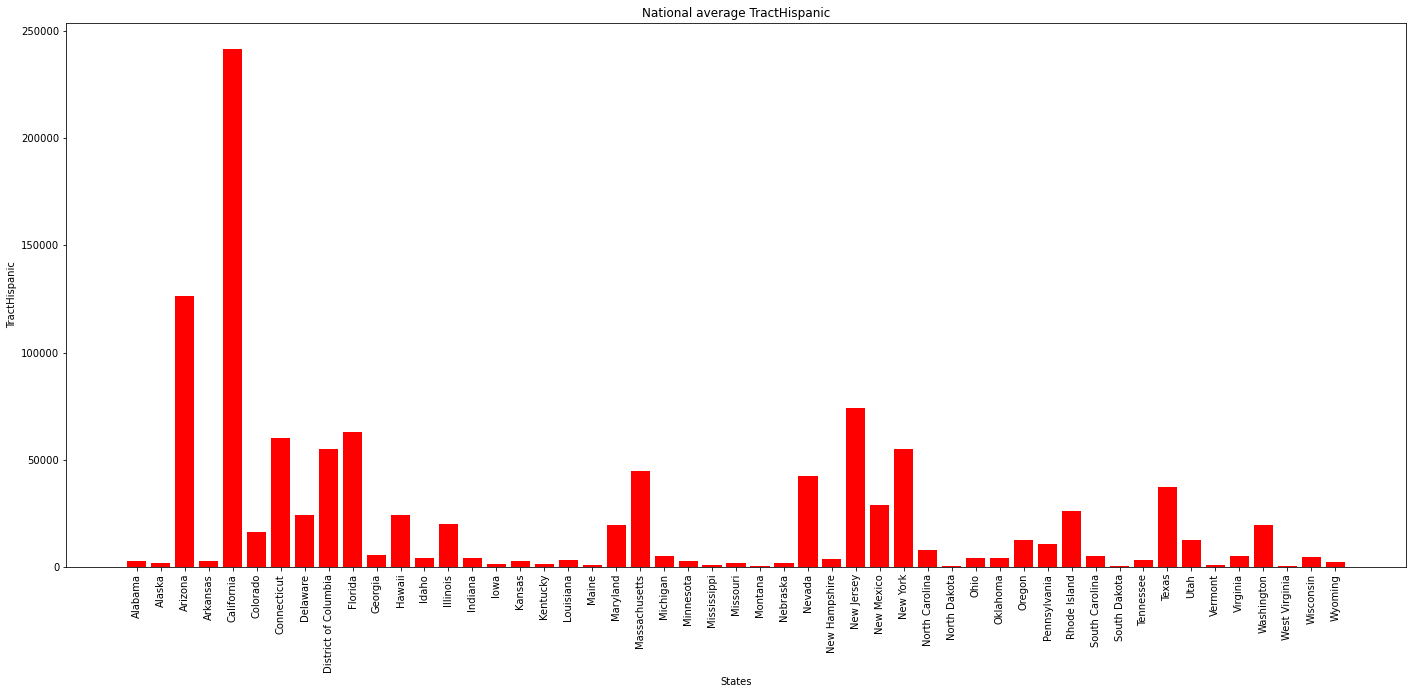

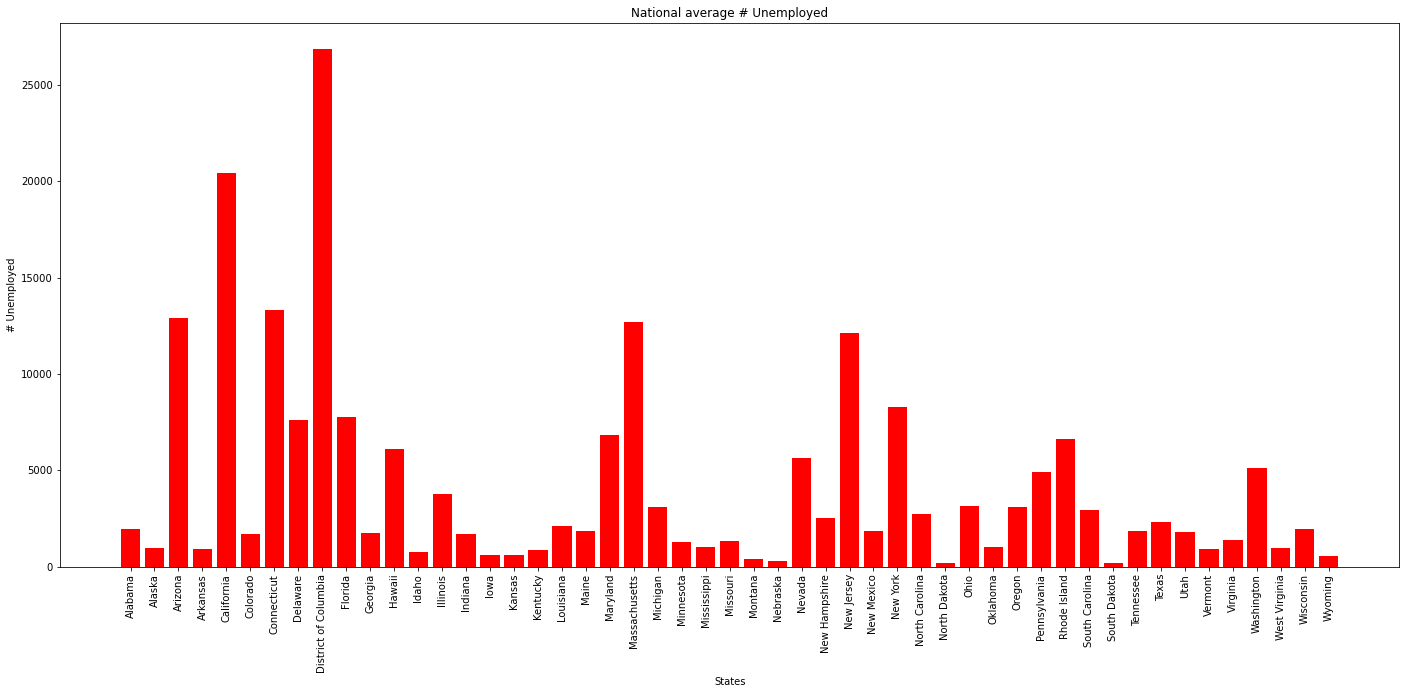

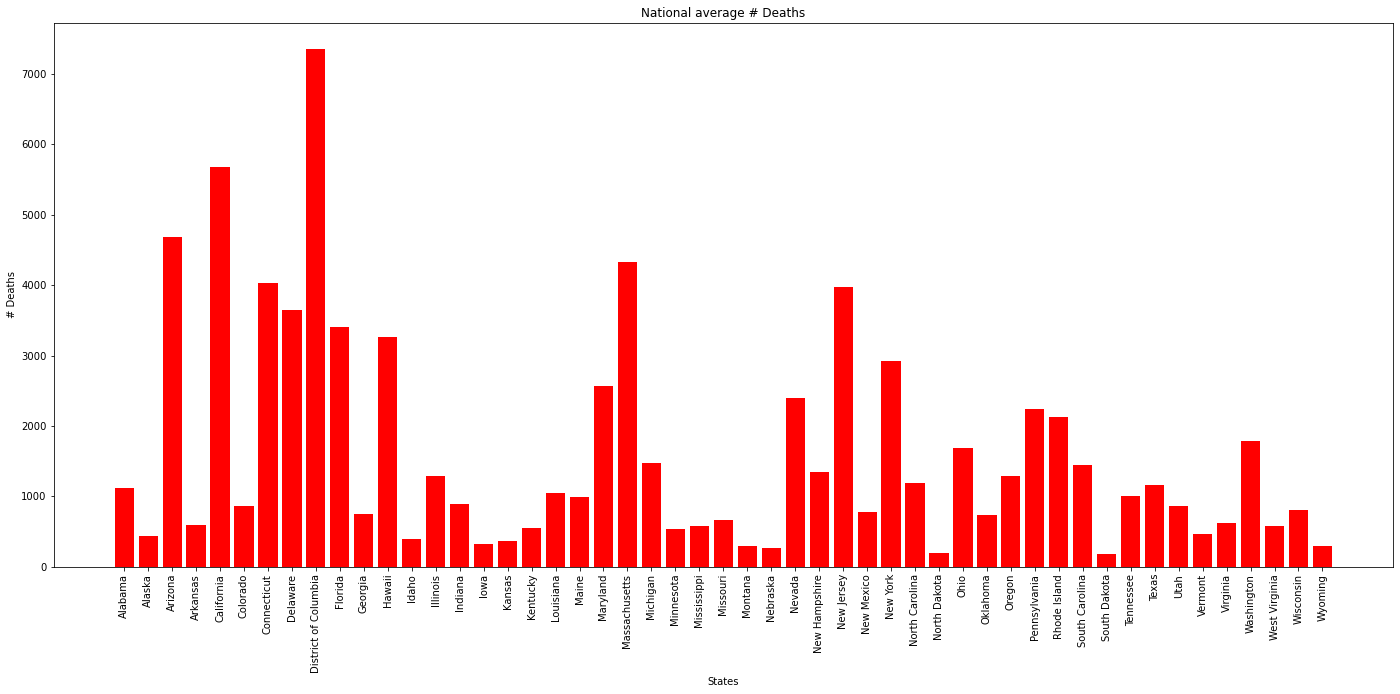

In [66]:
means = ["POP2010", "OHU2010", "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20", 
              "LILATracts_Vehicle", "LAPOP1_10", "LAPOP05_10", "LAPOP1_20", "LALOWI1_10", "LALOWI05_10", 
             "LALOWI1_20", "lapophalf", "TractKids", "TractSeniors", "TractWhite", 
             "TractBlack", "TractAsian", "TractNHOPI", "TractHispanic", "# Unemployed", 
              "# Deaths"]

states = average_df.index.values.tolist()
x_axis = np.arange(len(states))

for mean in means:
    f, ax = plt.subplots(figsize=(24,10))
    y_axis = average_df[mean].tolist()
    plt.bar(x_axis, y_axis, color='red', align='center')
    tick_loc = [value for value in x_axis]
    plt.xticks(tick_loc, states, rotation=90)
    plt.xlabel("States")
    plt.ylabel(mean)
    plt.title(f"National average {mean}")
    plt.savefig(f'bar_graphs/national_avg_{mean}.png')
    plt.show()

In [51]:


#max_obese_perc = average_df["% Obese"].idxmax()
#max_LAPOP1_10 = average_df["LALOWI1_10"].idxmax()

#max_obese_perc

#print(f"The state with the highest obese perc is {max_obese_perc} and the state with the highest low acces pop is {max_LAPOP1_10}.")

The state with the highest obese perc is Mississippi and the state with the highest low acces pop is Arizona.
